In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Считать файл
df = pd.read_excel("данные.xlsx", sheet_name='Данные')
print(df)

      ИБ Заболевание      Признак  Момент       Значение
0    ИБ1  Рак легких  Температура       1           36.6
1    ИБ1  Рак легких  Температура       3           36.7
2    ИБ1  Рак легких  Температура       6           37.2
3    ИБ1  Рак легких  Температура      11           36.9
4    ИБ1  Рак легких  Температура      17           37.2
..   ...         ...          ...     ...            ...
295  ИБ8      Ангина        Пульс      21            125
296  ИБ8      Ангина      Аппетит       1     нормальный
297  ИБ8      Ангина      Аппетит       2     нормальный
298  ИБ8      Ангина      Аппетит      15     пониженный
299  ИБ8      Ангина      Аппетит      19  избирательный

[300 rows x 5 columns]


In [18]:
# Подключение списка признаков и ИБ
tag = set(df.Признак.drop_duplicates())
MH = set(df.ИБ.drop_duplicates())
print(MH,tag)

{'ИБ5', 'ИБ1', 'ИБ8', 'ИБ4', 'ИБ6', 'ИБ2', 'ИБ7', 'ИБ3'} {'Кашель', 'Аппетит', 'Пульс', 'Цвет горла', 'Температура', 'Боль в горле'}


In [19]:
# Перебираем истории болезни

#
# for mh in MH:
#     result = df.loc[df['ИБ'] == mh]
#
def Graphs(result, mh):
    alter_name1=1
    alter_name2=1
    alter_name3=1
    alter_name4=1
    alter_name5=1

    exemplares_1=[]
    exemplares_2=[]
    exemplares_3=[]
    exemplares_4=[]
    exemplares_5=[]

    for tags in tag:

        # 1 and 2 periods
        result1=result.loc[result['Признак'] == tags]
        x= list(result1.Момент)
        y = list(result1.Значение)


        for i in x:
            # Делим моменты
            index = x.index(i)
            x_list_1 = x[:index+1]
            x_list_2 = x[index+1:]
            y_list_1 = y[:index+1]
            y_list_2 = y[index+1:]

            # Проверяем правильность разделения
            intersection = set(y_list_1) & set(y_list_2)
            if not intersection and len(x_list_1)<4 and len(x_list_2)<4 :


                if y_list_2:
 # 2 PERIODS
 #                    exemplares_2.append({'name':f'альтернатива_2.{str(alter_name2)}', 'MH':f'{mh}', 'tag':f'{tags}', 'NPD':'2', 'Values_PD_1':f'{set(y_list_1)}', 'lower_bound_1':f'{int(x_list_1[0])}', 'upper_bound_1':f'{int(x_list_1[-1])}', 'Values_PD_2': f'{set(y_list_2)}', 'lower_bound_2':f'{int(int(x_list_2[0]) - int(x_list_1[-1]))}', 'upper_bound_2':f'{int(int(x_list_2[-1])-int(x_list_1[-1]))}'})
 #                    alter_name2=alter_name2+1


                    # График
                    print(x)
                    print('Значения:',y_list_1,y_list_2)
                    print(f'Первый:  нижняя граница  {int(x_list_1[0])}, верхняя граница  {int(x_list_1[-1])}, значения {set(y_list_1)} ')
                    print(f'Второй:  нижняя граница  {int(x_list_2[0])} - {int(x_list_1[-1])}, верхняя граница  {int(x_list_2[-1])}-{int(x_list_1[-1])}, значения {set(y_list_2)} ')
                    plt.scatter(x, y)
                    plt.xlabel('Момент наблюдения')
                    plt.ylabel('Значение')
                    plt.title(f" {mh} История наблюдения признака {tags}")
                    plt.axvline(x=i)
                    plt.show()

                else:
# 1 PERIOD
#                     exemplares_1.append( {'name':f'альтернатива_1.{str(alter_name1)}', 'MH':f'{mh}','tag':f'{tags}', 'NPD':'1', 'Values_PD':f'{set(y_list_1)}', 'lower_bound':f'{int(x_list_1[0])}', 'upper_bound':f'{int(x_list_1[-1])}'})
#                     alter_name1=alter_name1+1

                    # График:
                    print (f'Один период, нижняя граница {x_list_1[0]}, верхняя граница {x_list_1[-1]}, значения {set(y_list_1)}')
                    plt.scatter(x, y)
                    plt.xlabel('Момент наблюдения')
                    plt.ylabel('Значение')
                    plt.title(f" {mh} История наблюдения признака {tags}")
                    plt.axvline(x=i)
                    plt.show()

# 3 PERIODS

        for i in x:
            # Делим моменты
            index = x.index(i)
            for j in x[1:]:
                index2=x.index(j)
                x_list_1 = x[:index+1]
                x_list_2 = x[index+1:index2+1]
                x_list_3 = x[index2+1:]
                y_list_1 = y[:index+1]
                y_list_2 = y[index+1:index2+1]
                y_list_3 = y[index2+1:]

                # Проверяем правильность разделения
                intersection = set(y_list_1) & set(y_list_2)
                intersection2 = set(y_list_2) & set(y_list_3)
                if not intersection and not intersection2 and y_list_1 and y_list_2 and y_list_3 and len(x_list_1)<4 and len(x_list_2)<4 and len(x_list_3)<4:

                    # exemplares_3.append({'name':f'альтернатива_3.{str(alter_name2)}', 'MH':f'{mh}', 'tag':f'{tags}', 'NPD':'3', 'Values_PD_1':f'{set(y_list_1)}', 'lower_bound_1':f'{int(x_list_1[0])}', 'upper_bound_1':f'{int(x_list_1[-1])}', 'Values_PD_2': f'{set(y_list_2)}', 'lower_bound_2':f'{int(int(x_list_2[0]) - int(x_list_1[-1]))}', 'upper_bound_2':f'{int(int(x_list_2[-1])-int(x_list_1[-1]))}', 'Values_PD_3': f'{set(y_list_3)}', 'lower_bound_3':f'{int(int(x_list_3[0]) - int(x_list_2[-1]))}', 'upper_bound_3':f'{int(int(x_list_3[-1])-int(x_list_2[-1]))}'} )
                    # alter_name3=alter_name3+1

                    # График
                    print(x)
                    print('lists:',y_list_1,y_list_2, y_list_3)

                    print(f'Первый:  нижняя граница  {int(x_list_1[0])}, верхняя граница  {int(x_list_1[-1])}, значения {set(y_list_1)} ')
                    print(f'Второй:  нижняя граница  {int(x_list_2[0])} - {int(x_list_1[-1])}, верхняя граница  {int(x_list_2[-1])}-{int(x_list_1[-1])}, значения {set(y_list_2)} ')
                    print(f'Третий:  нижняя граница  {int(x_list_3[0])} - {int(x_list_2[-1])}, верхняя граница  {int(x_list_3[-1])}-{int(x_list_2[-1])}, значения {set(y_list_3)} ')

                    plt.scatter(x, y)
                    plt.xlabel('Момент наблюдения')
                    plt.ylabel('Значение')
                    plt.title("История наблюдения признака")
                    plt.axvline(x=i, color = 'r')
                    plt.axvline(x=j, color = 'g')
                    plt.show()

# 4 PERIODS


        for i in x:
            # Делим моменты
            index = x.index(i)
            for j in x[1:]:
                index2=x.index(j)
                for k in x[2:]:
                    index3=x.index(k)
                    x_list_1 = x[:index+1]
                    x_list_2 = x[index+1:index2+1]
                    x_list_3 = x[index2+1:index3+1]
                    x_list_4 = x[index3+1:]

                    y_list_1 = y[:index+1]
                    y_list_2 = y[index+1:index2+1]
                    y_list_3 = y[index2+1:index3+1]
                    y_list_4 = y[index3+1:]


                    # Проверяем правильность разделения
                    intersection = set(y_list_1) & set(y_list_2)
                    intersection2 = set(y_list_2) & set(y_list_3)
                    intersection3 = set(y_list_3) & set(y_list_4)

                    if not intersection and not intersection2 and not intersection3 and y_list_1 and y_list_2 and y_list_3 and y_list_4 and len(x_list_1)<4 and len(x_list_2)<4 and len(x_list_3)<4 and len(x_list_4)<4 :

                        # exemplares_4.append({'name':f'альтернатива_4.{str(alter_name4)}', 'MH':f'{mh}', 'tag':f'{tags}', 'NPD':'4', 'Values_PD_1':f'{set(y_list_1)}', 'lower_bound_1':f'{int(x_list_1[0])}', 'upper_bound_1':f'{int(x_list_1[-1])}', 'Values_PD_2': f'{set(y_list_2)}', 'lower_bound_2':f'{int(int(x_list_2[0]) - int(x_list_1[-1]))}', 'upper_bound_2':f'{int(int(x_list_2[-1])-int(x_list_1[-1]))}', 'Values_PD_3': f'{set(y_list_3)}', 'lower_bound_3':f'{int(int(x_list_3[0]) - int(x_list_2[-1]))}', 'upper_bound_3':f'{int(int(x_list_3[-1])-int(x_list_2[-1]))}' , 'Values_PD_4': f'{set(y_list_4)}', 'lower_bound_4':f'{int(int(x_list_4[0]) - int(x_list_3[-1]))}', 'upper_bound_4':f'{int(int(x_list_4[-1])-int(x_list_3[-1]))}' } )
                        # alter_name4=alter_name4+1


                        # График
                        print(x)
                        print('lists:',y_list_1,y_list_2, y_list_3, y_list_4)

                        print(f'Первый:  нижняя граница  {int(x_list_1[0])}, верхняя граница  {int(x_list_1[-1])}, значения {set(y_list_1)} ')
                        print(f'Второй:  нижняя граница  {int(x_list_2[0])} - {int(x_list_1[-1])}, верхняя граница  {int(x_list_2[-1])}-{int(x_list_1[-1])}, значения {set(y_list_2)} ')
                        print(f'Третий:  нижняя граница  {int(x_list_3[0])} - {int(x_list_2[-1])}, верхняя граница  {int(x_list_3[-1])}-{int(x_list_2[-1])}, значения {set(y_list_3)} ')
                        print(f'Четвертый:  нижняя граница  {int(x_list_4[0])} - {int(x_list_3[-1])}, верхняя граница  {int(x_list_4[-1])}-{int(x_list_3[-1])}, значения {set(y_list_4)} ')

                        plt.scatter(x, y)
                        plt.xlabel('Момент наблюдения')
                        plt.ylabel('Значение')
                        plt.title("История наблюдения признака")
                        plt.axvline(x=i,color = 'r' )
                        plt.axvline(x=j, color = 'g')
                        plt.axvline(x=k, color = 'b')
                        plt.show()

# 5 PERIODS

        for i in x:
            # Делим моменты
            index = x.index(i)
            for j in x[1:]:
                index2=x.index(j)
                for k in x[2:]:
                    index3=x.index(k)
                    for l in x[3:]:
                        index4=x.index(l)
                        x_list_1 = x[:index+1]
                        x_list_2 = x[index+1:index2+1]
                        x_list_3 = x[index2+1:index3+1]
                        x_list_4 = x[index3+1:index4+1]
                        x_list_5 = x[index4+1:]

                        y_list_1 = y[:index+1]
                        y_list_2 = y[index+1:index2+1]
                        y_list_3 = y[index2+1:index3+1]
                        y_list_4 = y[index3+1:index4+1]
                        y_list_5 = y[index4+1:]



                        # Проверяем правильность разделения
                        intersection = set(y_list_1) & set(y_list_2)
                        intersection2 = set(y_list_2) & set(y_list_3)
                        intersection3 = set(y_list_3) & set(y_list_4)
                        intersection4 = set(y_list_4) & set(y_list_5)


                        if not intersection and not intersection2 and not intersection3 and not intersection4 and y_list_1 and y_list_2 and y_list_3 and y_list_4 and y_list_5 and len(x_list_1)<4 and len(x_list_2)<4 and len(x_list_3)<4 and len(x_list_4)<4 and len(x_list_5)<4:


                            # exemplares_5.append({'name':f'альтернатива_5.{str(alter_name5)}', 'MH':f'{mh}', 'tag':f'{tags}', 'NPD':'5', 'Values_PD_1':f'{set(y_list_1)}', 'lower_bound_1':f'{int(x_list_1[0])}', 'upper_bound_1':f'{int(x_list_1[-1])}', 'Values_PD_2': f'{set(y_list_2)}', 'lower_bound_2':f'{int(int(x_list_2[0]) - int(x_list_1[-1]))}', 'upper_bound_2':f'{int(int(x_list_2[-1])-int(x_list_1[-1]))}', 'Values_PD_3': f'{set(y_list_3)}', 'lower_bound_3':f'{int(int(x_list_3[0]) - int(x_list_2[-1]))}', 'upper_bound_3':f'{int(int(x_list_3[-1])-int(x_list_2[-1]))}' , 'Values_PD_4': f'{set(y_list_4)}', 'lower_bound_4':f'{int(int(x_list_4[0]) - int(x_list_3[-1]))}', 'upper_bound_4':f'{int(int(x_list_4[-1])-int(x_list_3[-1]))}', 'Values_PD_5': f'{set(y_list_5)}', 'lower_bound_5':f'{int(int(x_list_5[0]) - int(x_list_4[-1]))}', 'upper_bound_5':f'{int(int(x_list_5[-1])-int(x_list_4[-1]))}' } )
                            # alter_name5=alter_name5+1

                            #График
                            print(x)
                            print('Значения периодов:',y_list_1,y_list_2, y_list_3, y_list_4, y_list_5)

                            print(f'Первый:  нижняя граница  {int(x_list_1[0])}, верхняя граница  {int(x_list_1[-1])}, значения {set(y_list_1)} ')
                            print(f'Второй:  нижняя граница  {int(x_list_2[0])} - {int(x_list_1[-1])}, верхняя граница  {int(x_list_2[-1])}-{int(x_list_1[-1])}, значения {set(y_list_2)} ')
                            print(f'Третий:  нижняя граница  {int(x_list_3[0])} - {int(x_list_2[-1])}, верхняя граница  {int(x_list_3[-1])}-{int(x_list_2[-1])}, значения {set(y_list_3)} ')
                            print(f'Четвертый:  нижняя граница  {int(x_list_4[0])} - {int(x_list_3[-1])}, верхняя граница  {int(x_list_4[-1])}-{int(x_list_3[-1])}, значения {set(y_list_4)} ')
                            print(f'Пятый:  нижняя граница  {int(x_list_5[0])} - {int(x_list_4[-1])}, верхняя граница  {int(x_list_5[-1])}-{int(x_list_4[-1])}, значения {set(y_list_5)} ')

                            plt.scatter(x, y)
                            plt.xlabel('Момент наблюдения')
                            plt.ylabel('Значение')
                            plt.title("История наблюдения признака")
                            plt.axvline(x=i,color = 'r' )
                            plt.axvline(x=j, color = 'g')
                            plt.axvline(x=k, color = 'b')
                            plt.axvline(x=l, color = 'm')
                            plt.show()





[3, 5, 7, 11, 13, 15]
Значения: ['сухой', 'сухой', 'удушающий'] ['влажный', 'отхаркивающий', 'с кровью']
Первый:  нижняя граница  3, верхняя граница  7, значения {'сухой', 'удушающий'} 
Второй:  нижняя граница  11 - 7, верхняя граница  15-7, значения {'влажный', 'отхаркивающий', 'с кровью'} 


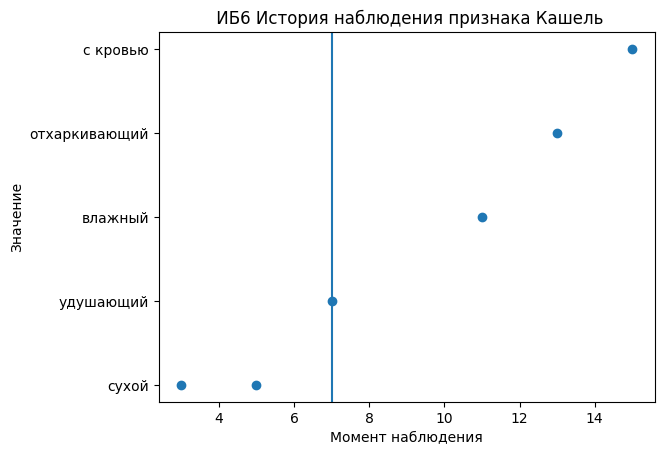

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий'] ['влажный', 'отхаркивающий', 'с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  7-5, значения {'удушающий'} 
Третий:  нижняя граница  11 - 7, верхняя граница  15-7, значения {'влажный', 'отхаркивающий', 'с кровью'} 


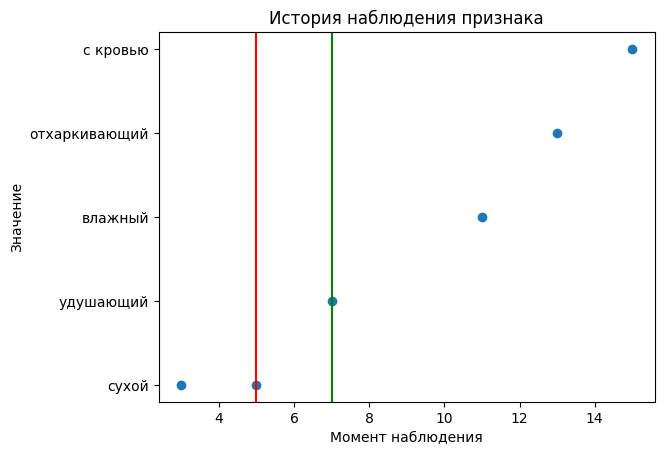

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий', 'влажный'] ['отхаркивающий', 'с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  11-5, значения {'влажный', 'удушающий'} 
Третий:  нижняя граница  13 - 11, верхняя граница  15-11, значения {'отхаркивающий', 'с кровью'} 


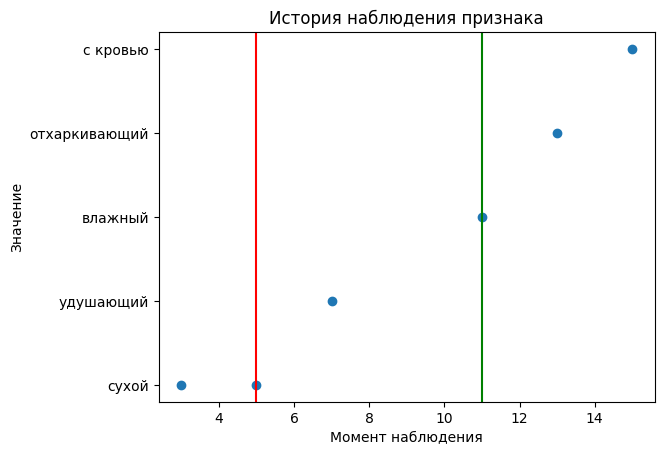

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий', 'влажный', 'отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  13-5, значения {'влажный', 'отхаркивающий', 'удушающий'} 
Третий:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


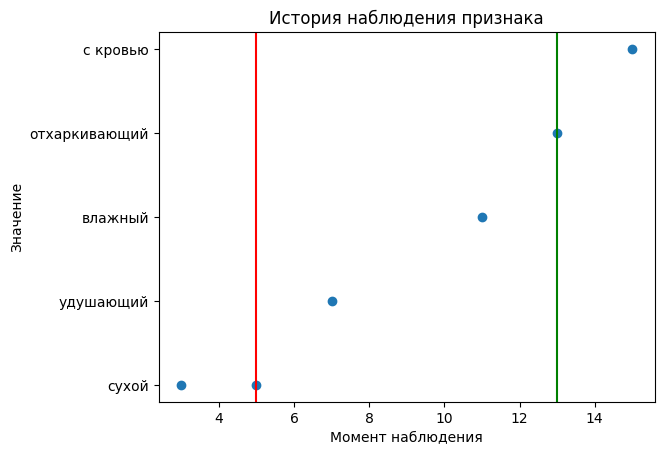

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой', 'удушающий'] ['влажный'] ['отхаркивающий', 'с кровью']
Первый:  нижняя граница  3, верхняя граница  7, значения {'сухой', 'удушающий'} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {'влажный'} 
Третий:  нижняя граница  13 - 11, верхняя граница  15-11, значения {'отхаркивающий', 'с кровью'} 


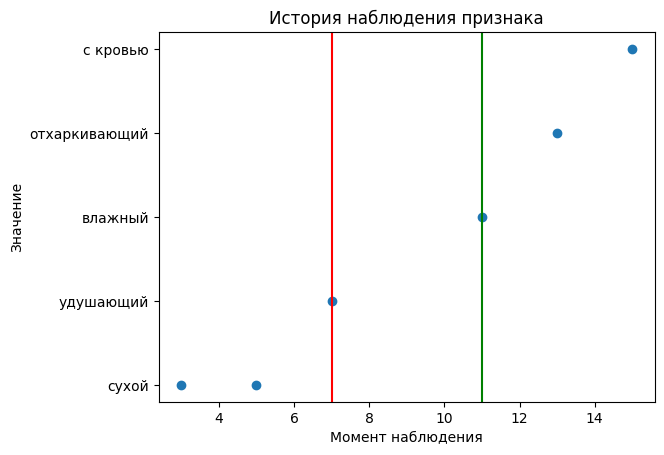

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой', 'удушающий'] ['влажный', 'отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  7, значения {'сухой', 'удушающий'} 
Второй:  нижняя граница  11 - 7, верхняя граница  13-7, значения {'влажный', 'отхаркивающий'} 
Третий:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


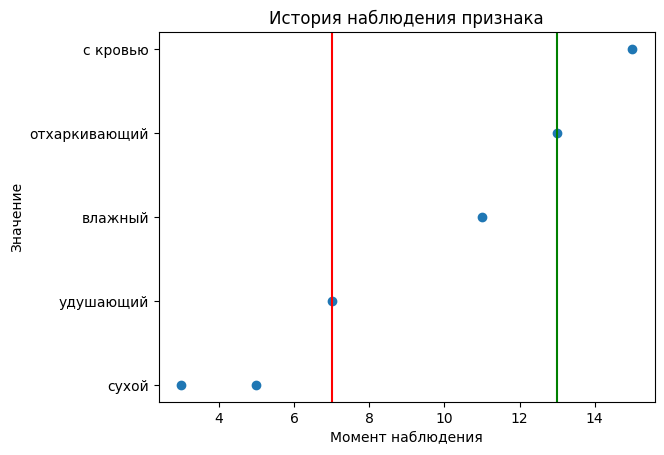

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий'] ['влажный'] ['отхаркивающий', 'с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  7-5, значения {'удушающий'} 
Третий:  нижняя граница  11 - 7, верхняя граница  11-7, значения {'влажный'} 
Четвертый:  нижняя граница  13 - 11, верхняя граница  15-11, значения {'отхаркивающий', 'с кровью'} 


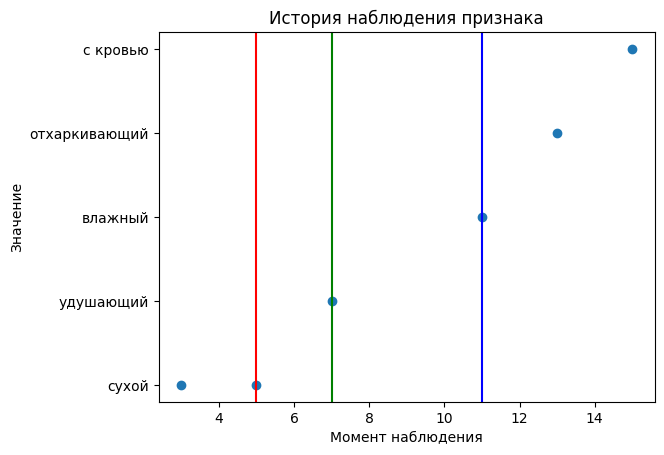

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий'] ['влажный', 'отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  7-5, значения {'удушающий'} 
Третий:  нижняя граница  11 - 7, верхняя граница  13-7, значения {'влажный', 'отхаркивающий'} 
Четвертый:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


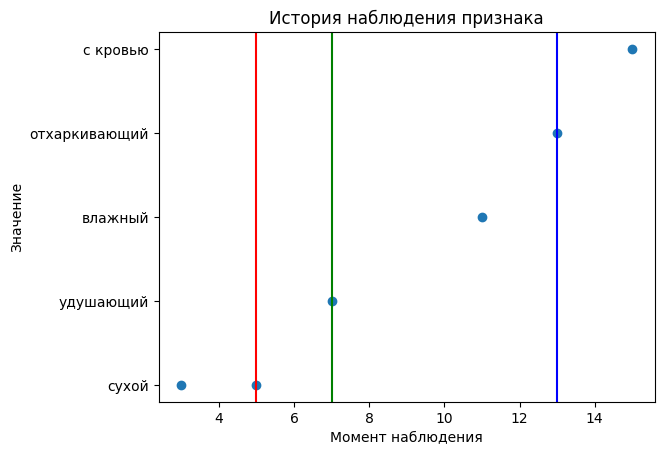

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой'] ['удушающий', 'влажный'] ['отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  11-5, значения {'влажный', 'удушающий'} 
Третий:  нижняя граница  13 - 11, верхняя граница  13-11, значения {'отхаркивающий'} 
Четвертый:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


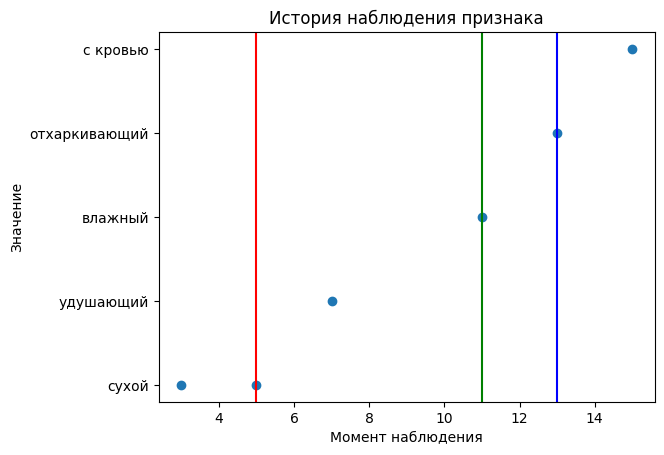

[3, 5, 7, 11, 13, 15]
lists: ['сухой', 'сухой', 'удушающий'] ['влажный'] ['отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  7, значения {'сухой', 'удушающий'} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {'влажный'} 
Третий:  нижняя граница  13 - 11, верхняя граница  13-11, значения {'отхаркивающий'} 
Четвертый:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


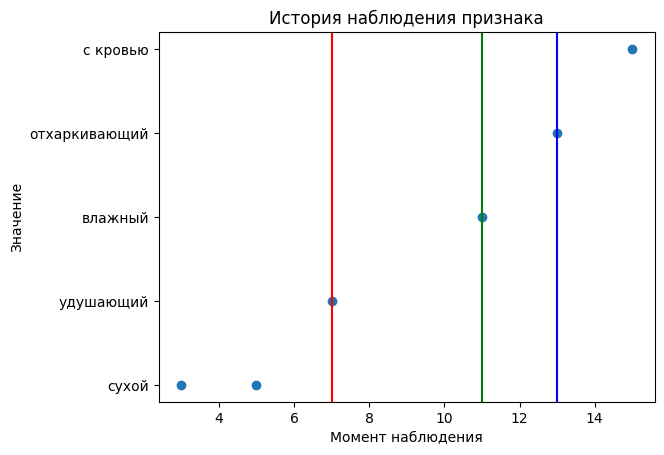

[3, 5, 7, 11, 13, 15]
Значения периодов: ['сухой', 'сухой'] ['удушающий'] ['влажный'] ['отхаркивающий'] ['с кровью']
Первый:  нижняя граница  3, верхняя граница  5, значения {'сухой'} 
Второй:  нижняя граница  7 - 5, верхняя граница  7-5, значения {'удушающий'} 
Третий:  нижняя граница  11 - 7, верхняя граница  11-7, значения {'влажный'} 
Четвертый:  нижняя граница  13 - 11, верхняя граница  13-11, значения {'отхаркивающий'} 
Пятый:  нижняя граница  15 - 13, верхняя граница  15-13, значения {'с кровью'} 


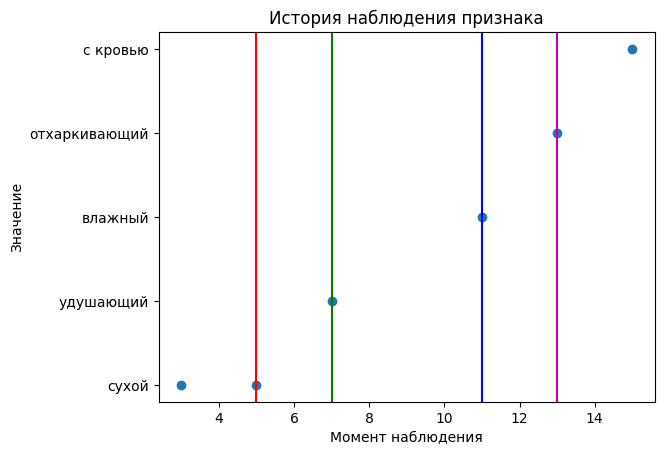

[1, 2, 3, 15]
Значения: ['повышенный', 'повышенный'] ['нормальный', 'избирательный']
Первый:  нижняя граница  1, верхняя граница  2, значения {'повышенный'} 
Второй:  нижняя граница  3 - 2, верхняя граница  15-2, значения {'избирательный', 'нормальный'} 


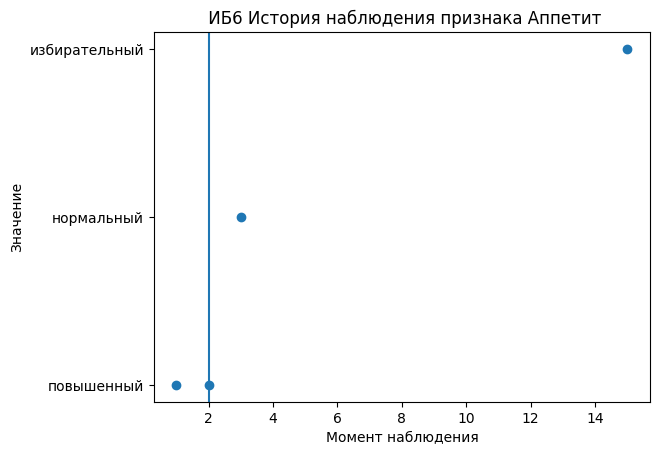

[1, 2, 3, 15]
Значения: ['повышенный', 'повышенный', 'нормальный'] ['избирательный']
Первый:  нижняя граница  1, верхняя граница  3, значения {'нормальный', 'повышенный'} 
Второй:  нижняя граница  15 - 3, верхняя граница  15-3, значения {'избирательный'} 


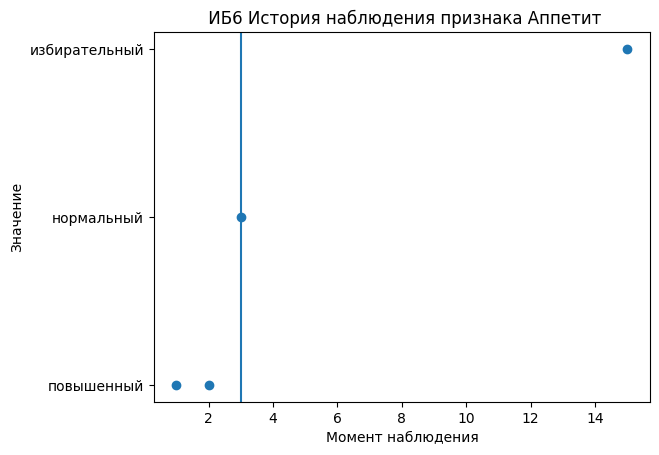

[1, 2, 3, 15]
lists: ['повышенный', 'повышенный'] ['нормальный'] ['избирательный']
Первый:  нижняя граница  1, верхняя граница  2, значения {'повышенный'} 
Второй:  нижняя граница  3 - 2, верхняя граница  3-2, значения {'нормальный'} 
Третий:  нижняя граница  15 - 3, верхняя граница  15-3, значения {'избирательный'} 


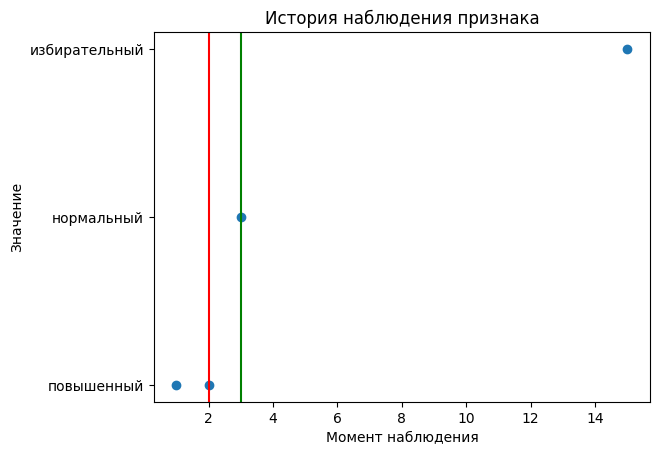

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72] [78, 120, 85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


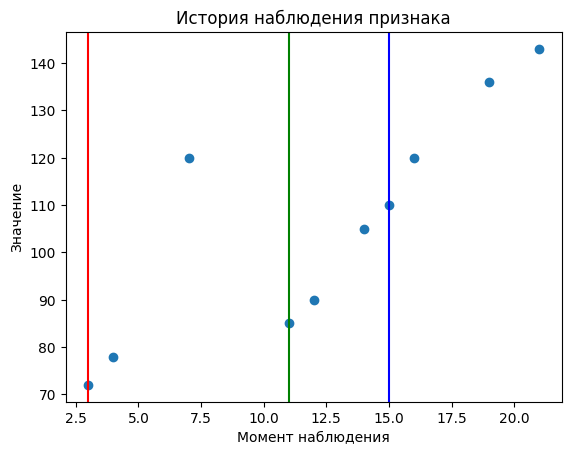

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78] [120, 85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


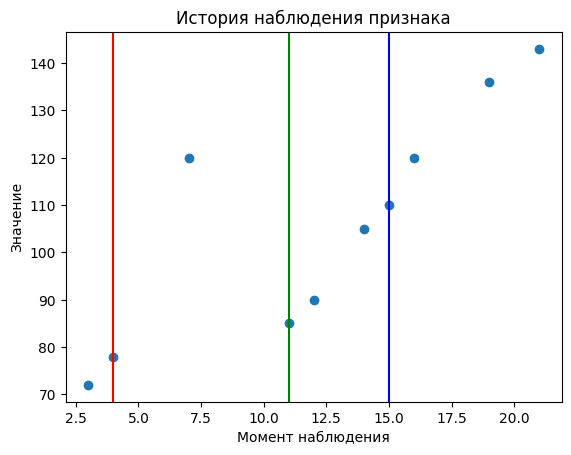

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78] [120, 85, 90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


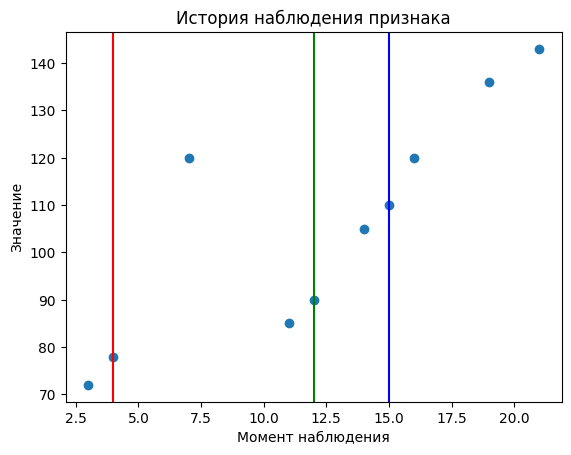

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


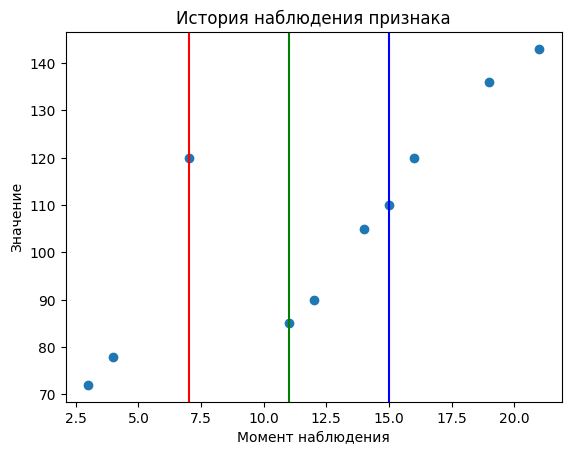

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85, 90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


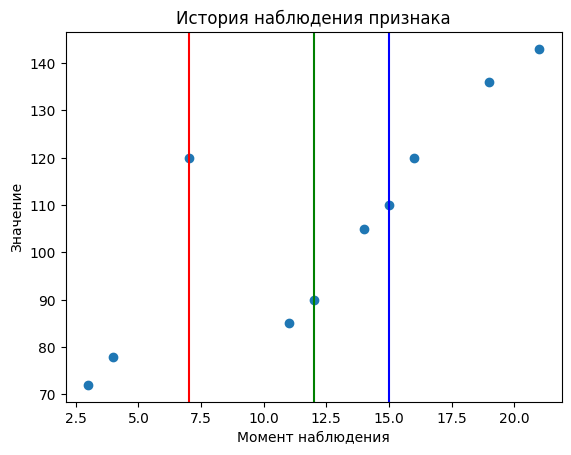

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85, 90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Четвертый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


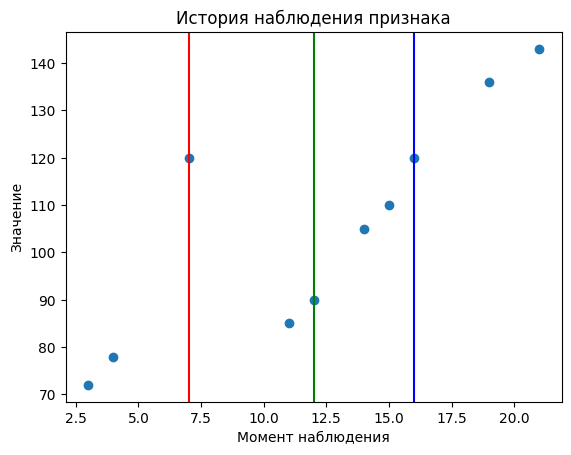

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85, 90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


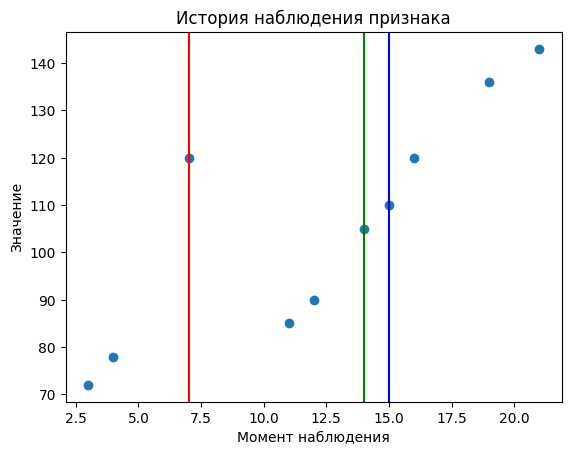

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85, 90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Четвертый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


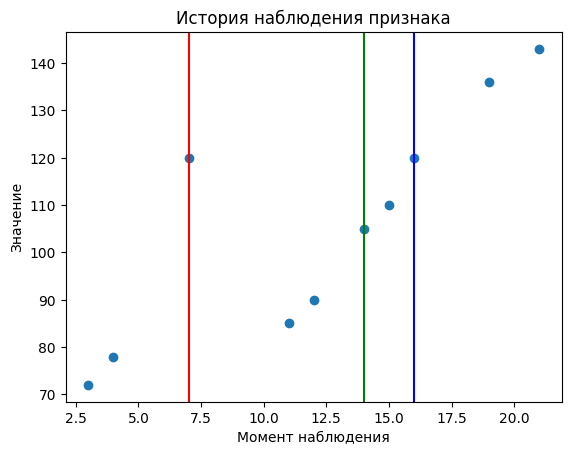

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
lists: [72, 78, 120] [85, 90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Четвертый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


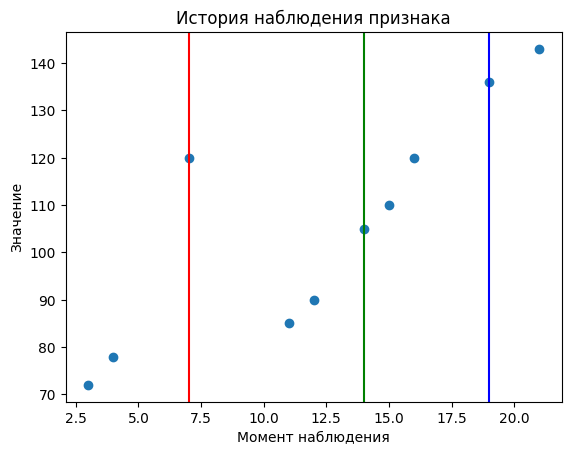

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78] [120, 85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {78} 
Третий:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Четвертый:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


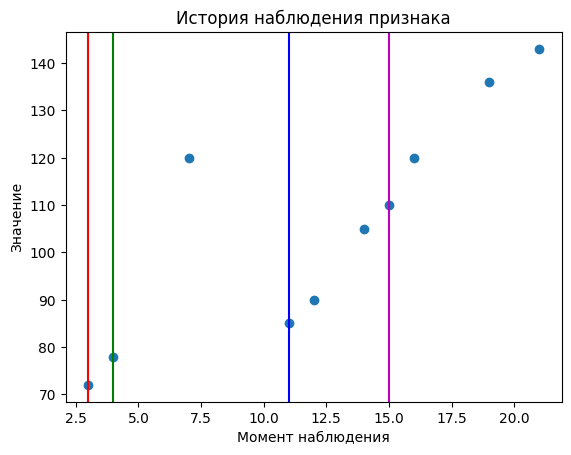

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78] [120, 85, 90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {78} 
Третий:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


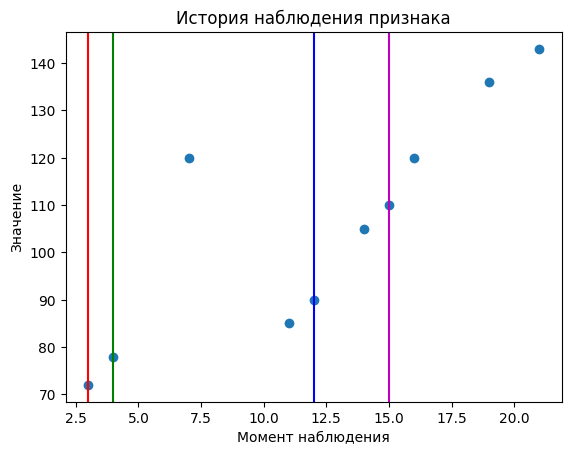

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Четвертый:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


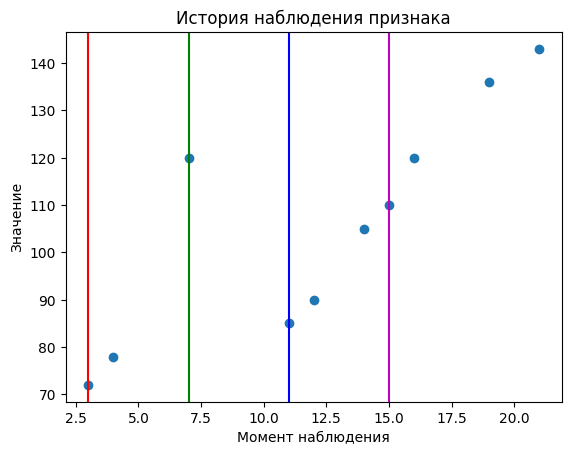

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85, 90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


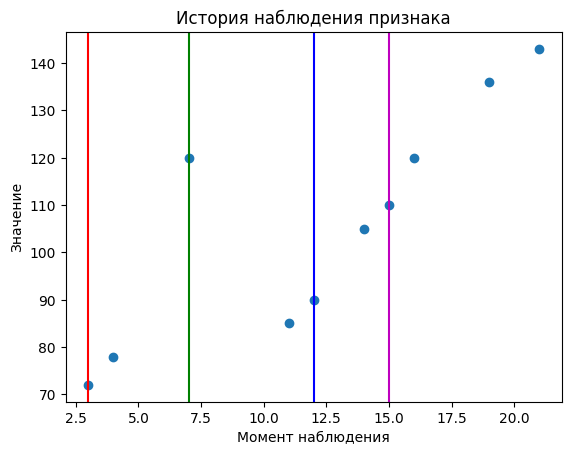

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85, 90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


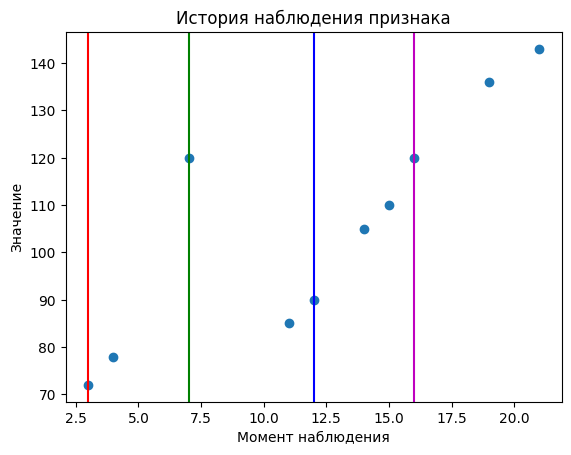

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85, 90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


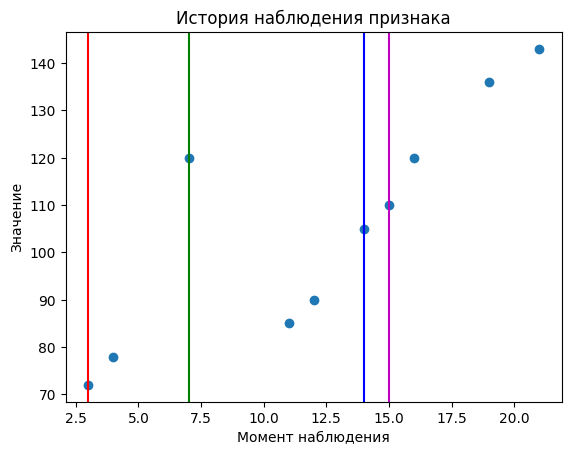

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85, 90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


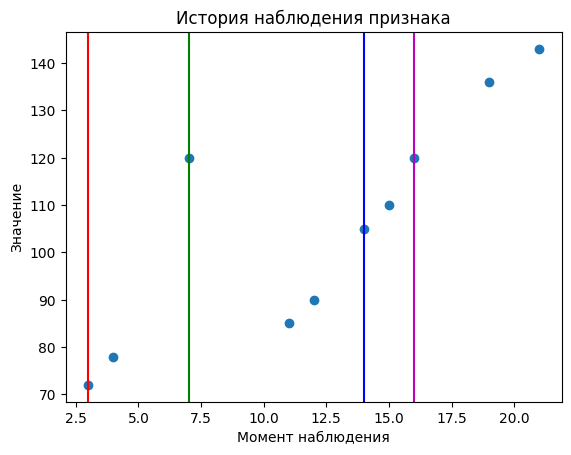

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120] [85, 90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  7-3, значения {120, 78} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


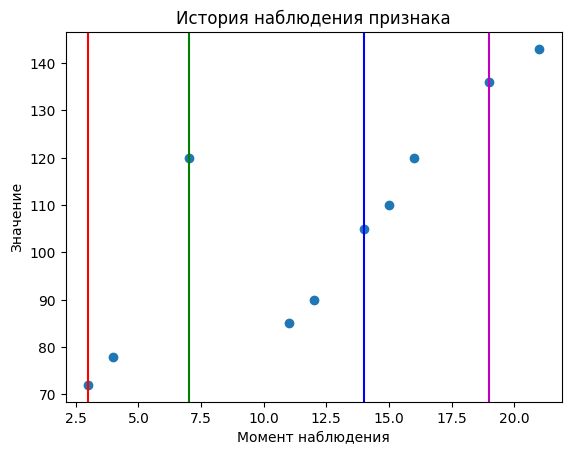

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


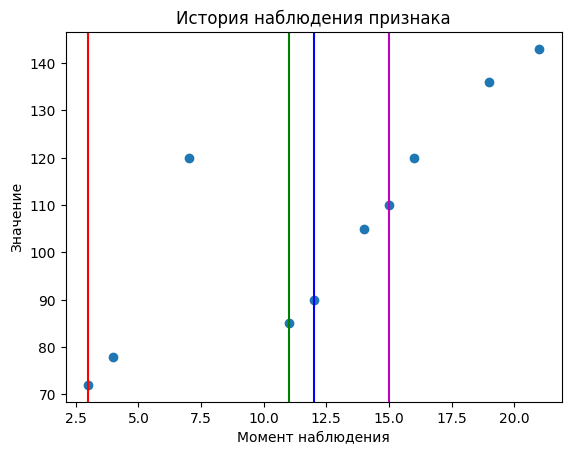

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


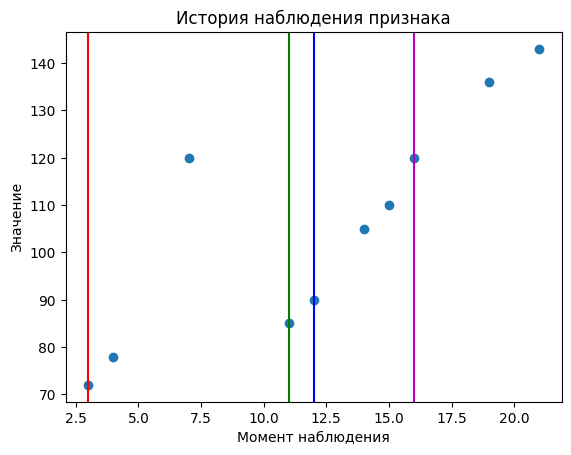

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


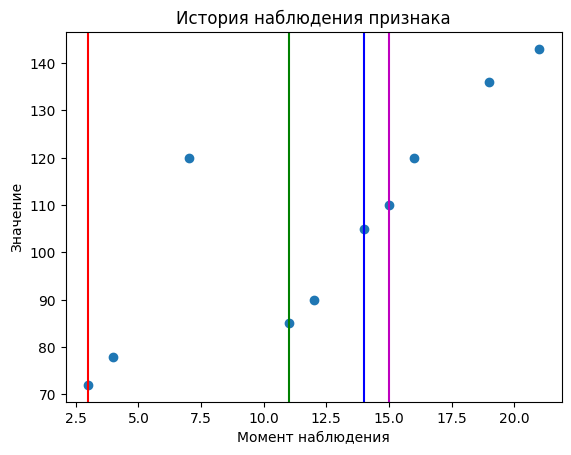

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


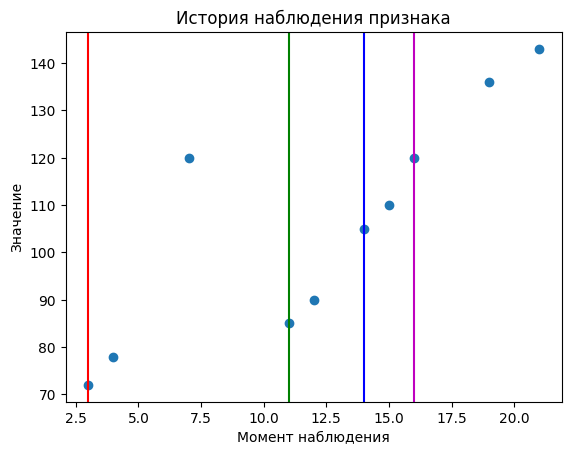

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


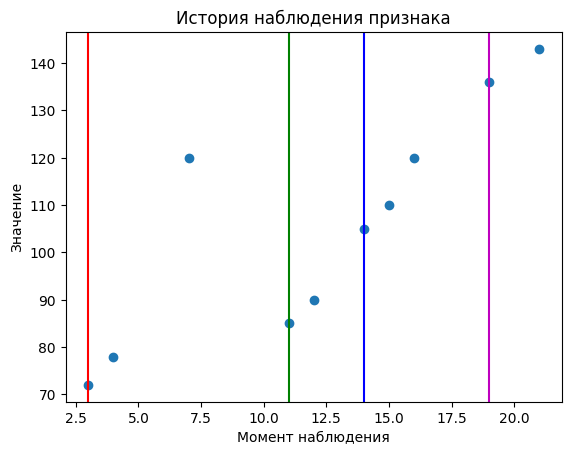

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90, 105, 110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


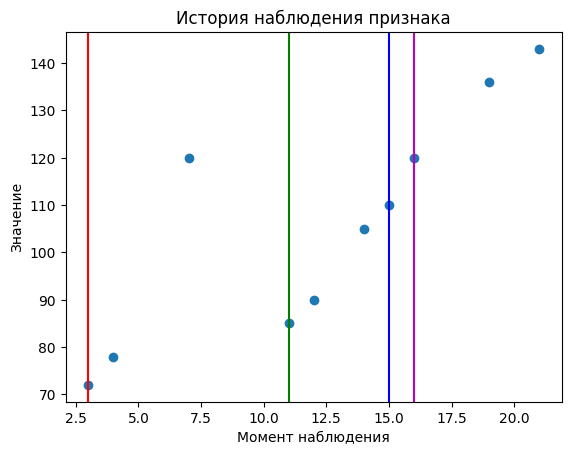

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72] [78, 120, 85] [90, 105, 110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  3, значения {72} 
Второй:  нижняя граница  4 - 3, верхняя граница  11-3, значения {120, 85, 78} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


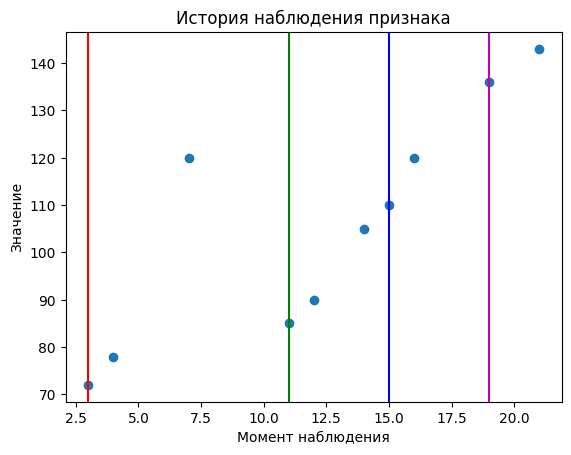

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85] [90, 105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Четвертый:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


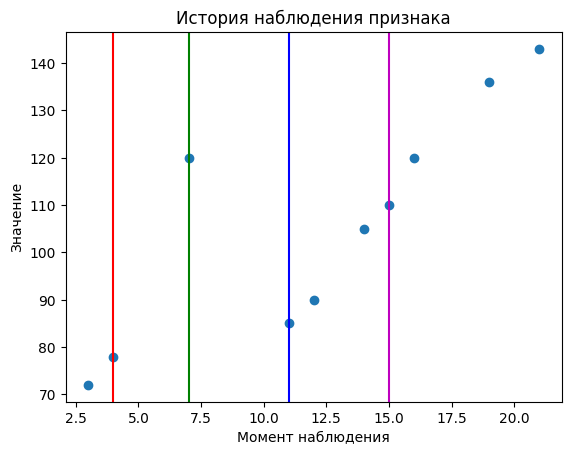

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85, 90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


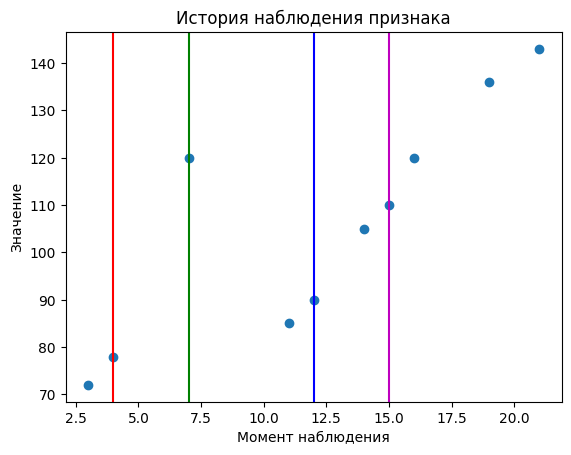

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85, 90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


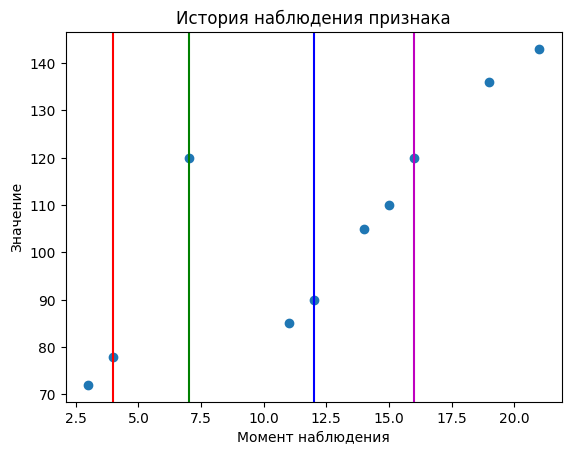

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85, 90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


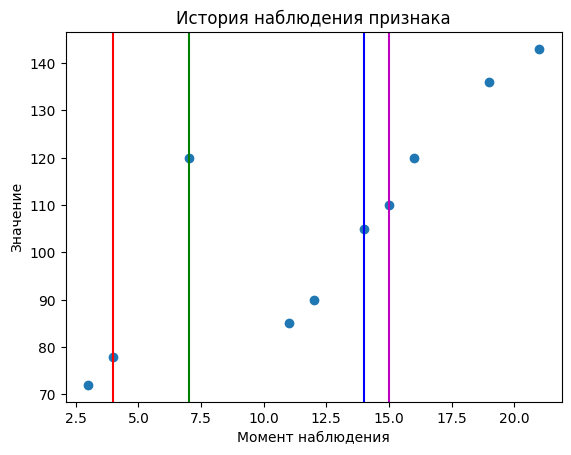

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85, 90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


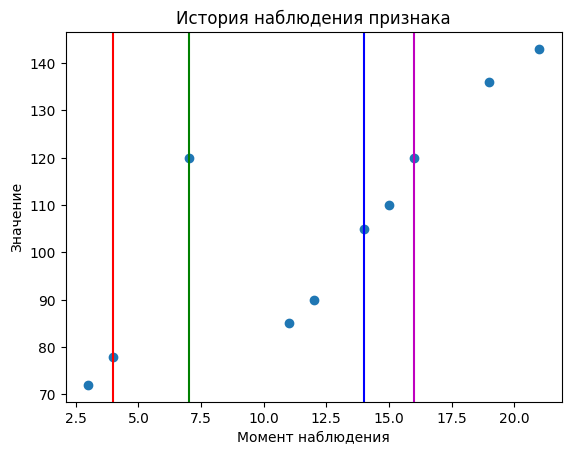

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120] [85, 90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  7-4, значения {120} 
Третий:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


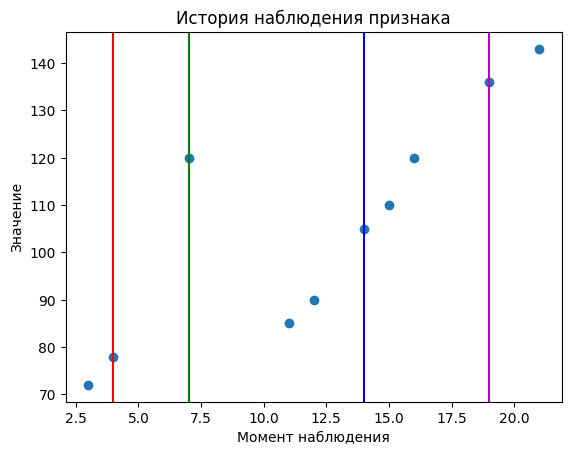

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


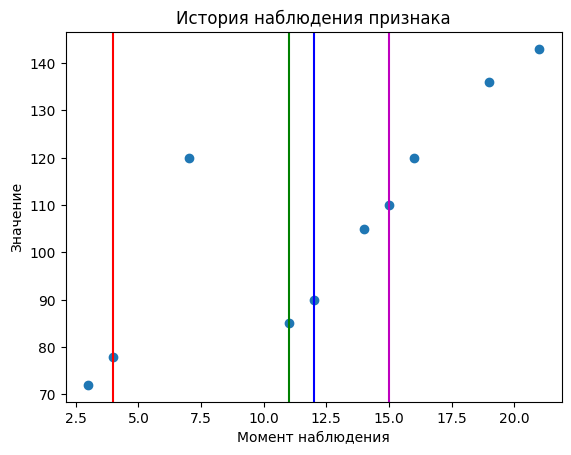

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


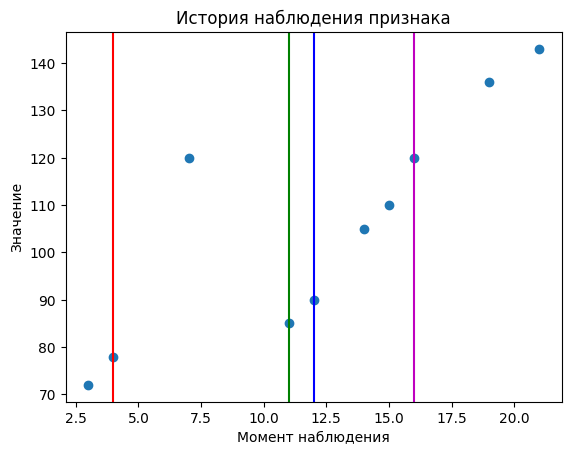

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


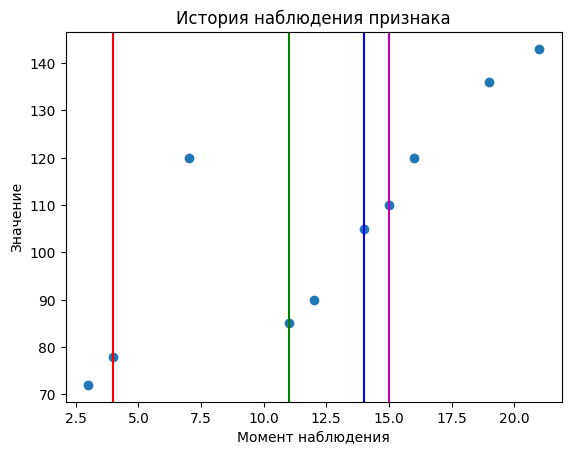

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


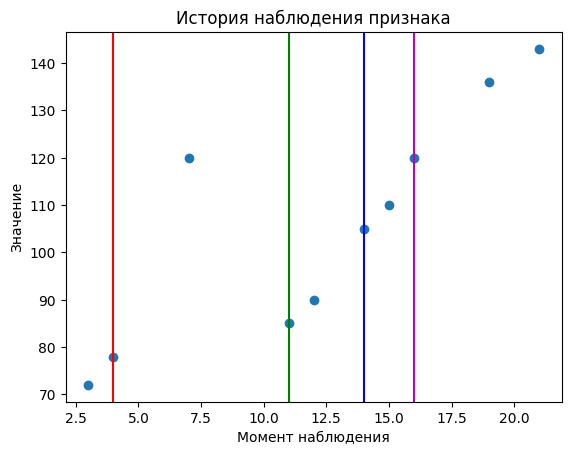

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


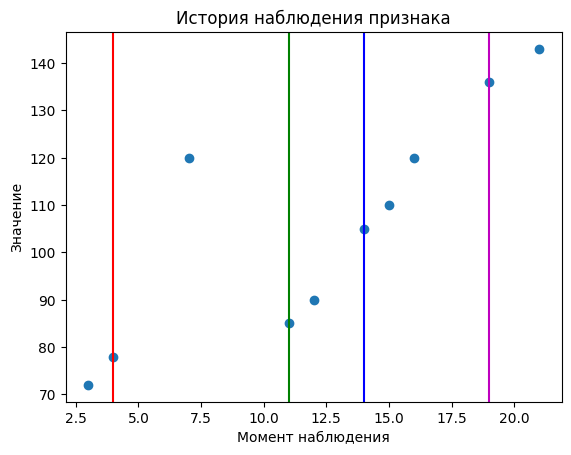

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90, 105, 110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


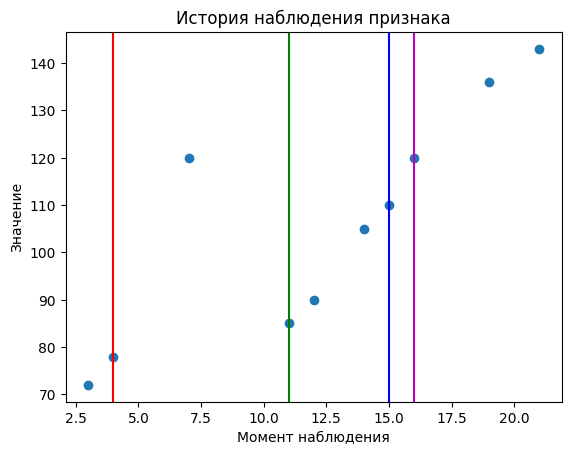

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85] [90, 105, 110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  11-4, значения {120, 85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


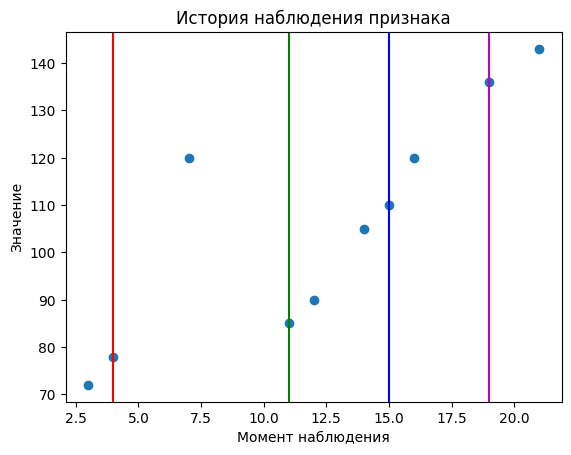

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85, 90] [105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


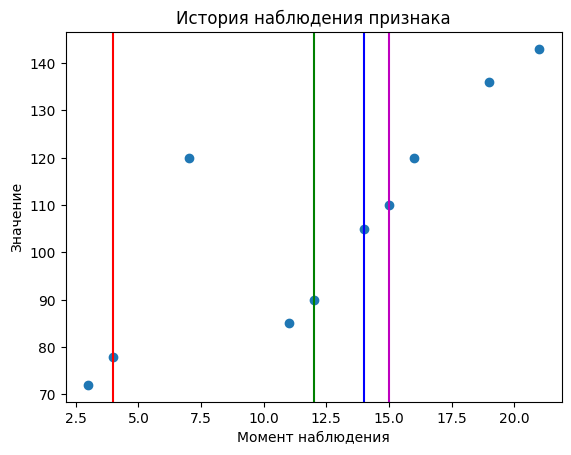

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85, 90] [105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


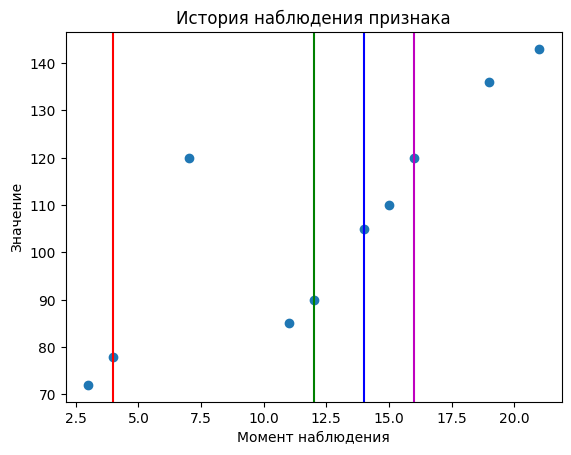

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85, 90] [105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


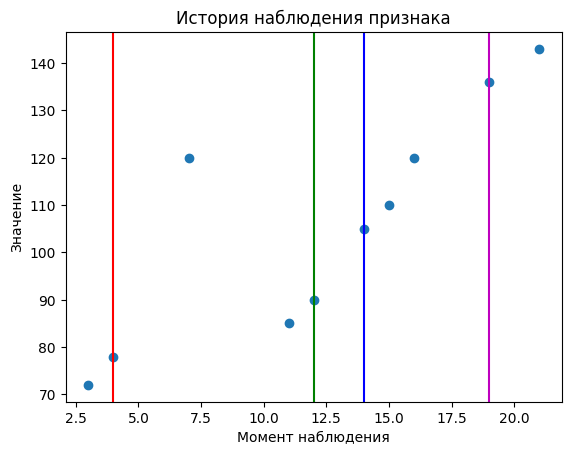

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85, 90] [105, 110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


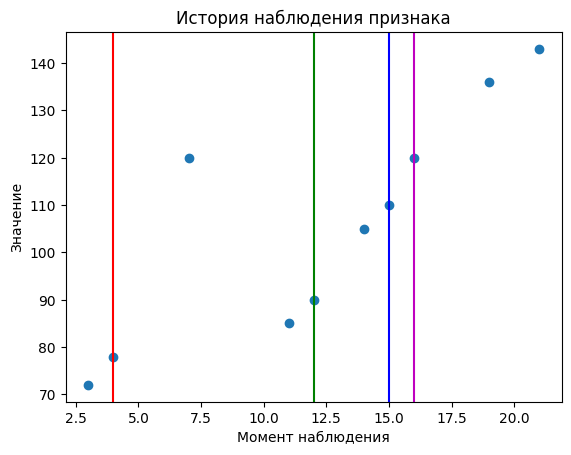

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78] [120, 85, 90] [105, 110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  4, значения {72, 78} 
Второй:  нижняя граница  7 - 4, верхняя граница  12-4, значения {120, 90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


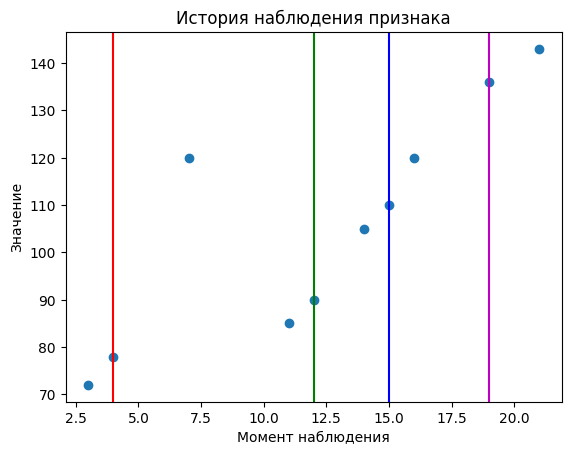

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90] [105, 110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


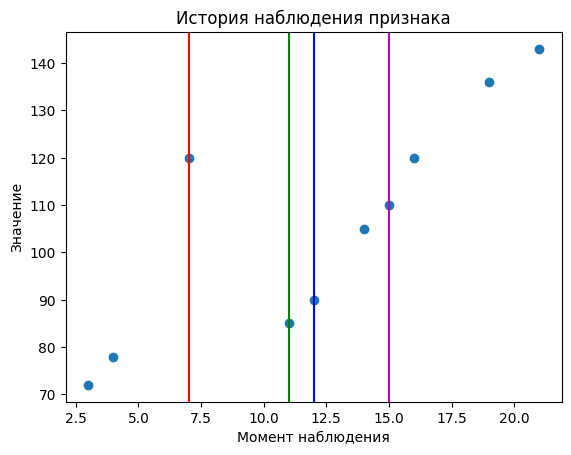

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90] [105, 110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  12-11, значения {90} 
Четвертый:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


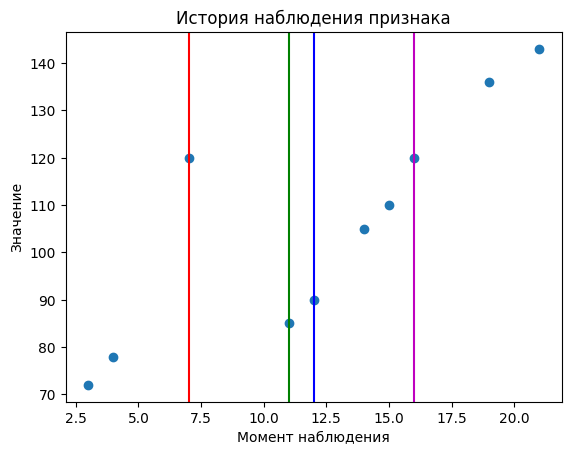

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90, 105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


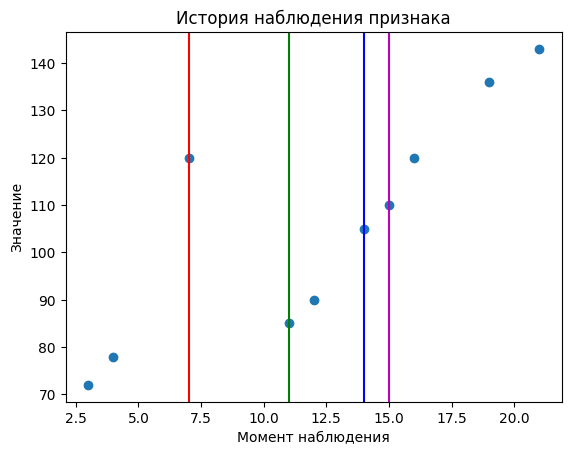

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90, 105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


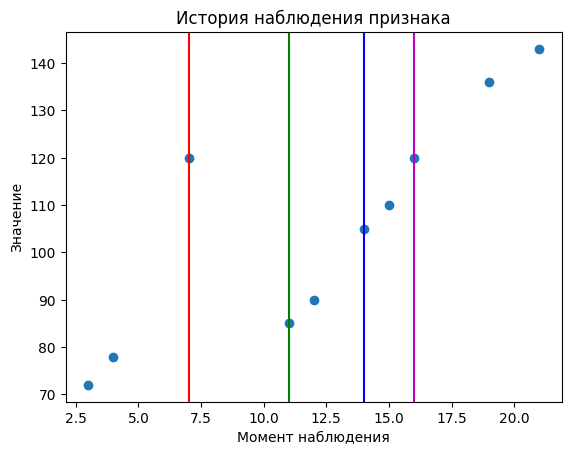

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90, 105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  14-11, значения {105, 90} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


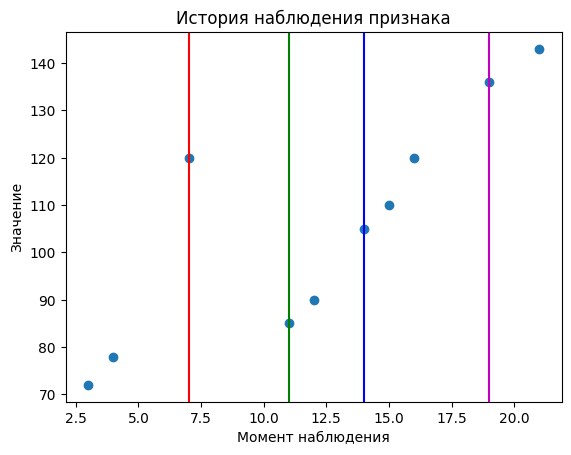

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90, 105, 110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


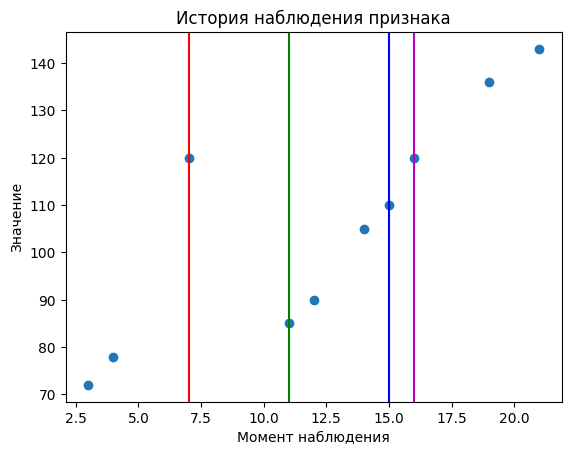

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85] [90, 105, 110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  11-7, значения {85} 
Третий:  нижняя граница  12 - 11, верхняя граница  15-11, значения {105, 90, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


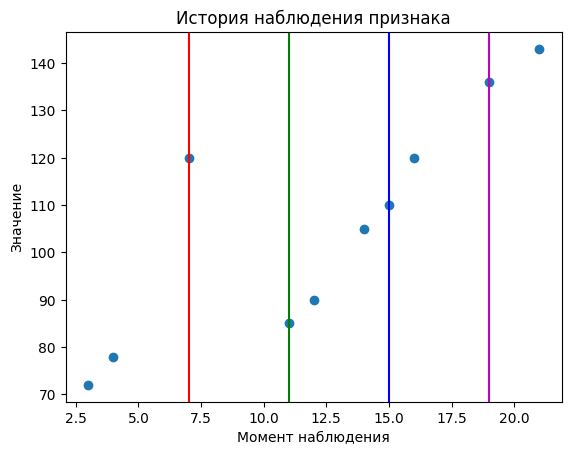

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105] [110] [120, 136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Пятый:  нижняя граница  16 - 15, верхняя граница  21-15, значения {120, 136, 143} 


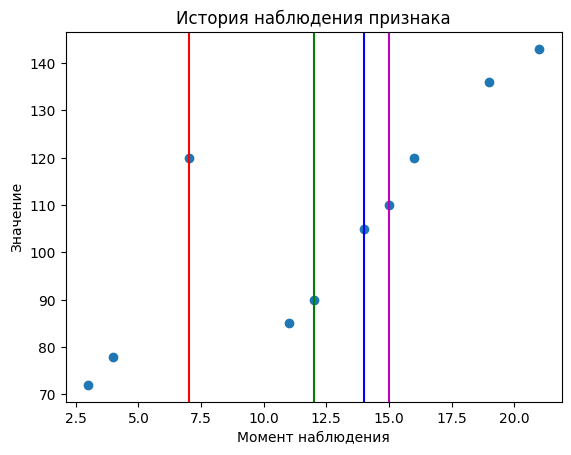

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105] [110, 120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


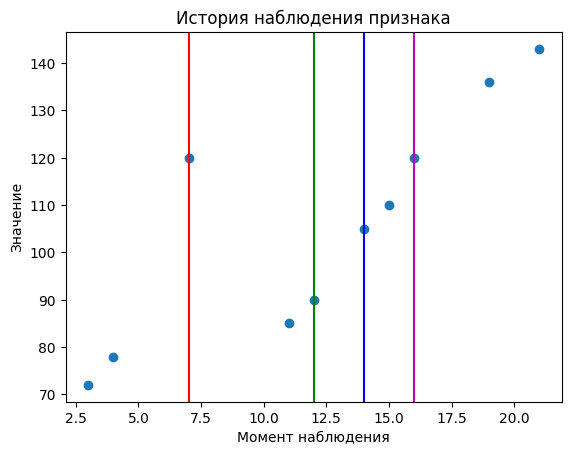

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105] [110, 120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  14-12, значения {105} 
Четвертый:  нижняя граница  15 - 14, верхняя граница  19-14, значения {120, 136, 110} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


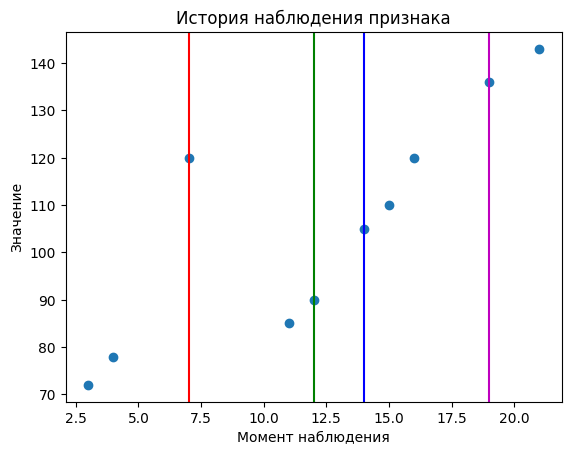

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105, 110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


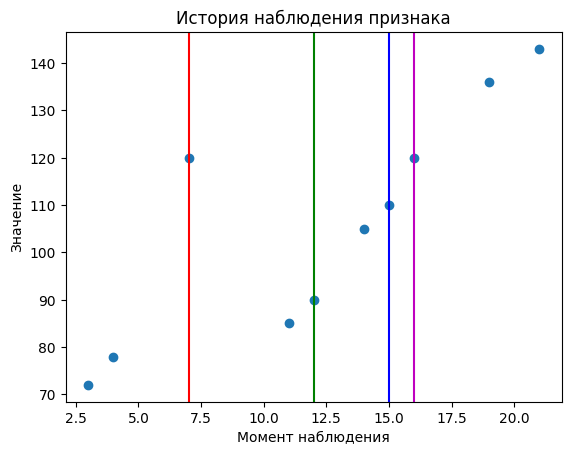

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105, 110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  15-12, значения {105, 110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


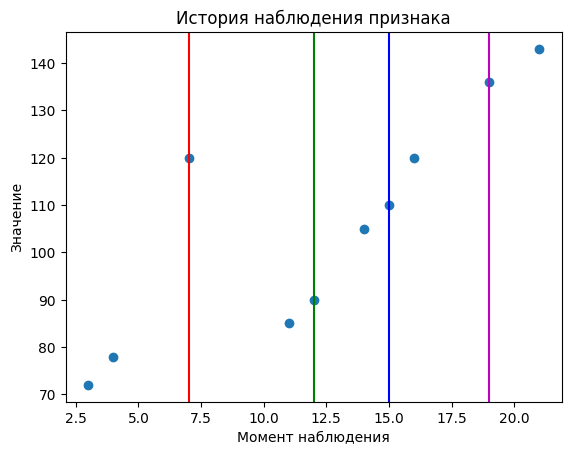

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90] [105, 110, 120] [136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  12-7, значения {90, 85} 
Третий:  нижняя граница  14 - 12, верхняя граница  16-12, значения {120, 105, 110} 
Четвертый:  нижняя граница  19 - 16, верхняя граница  19-16, значения {136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


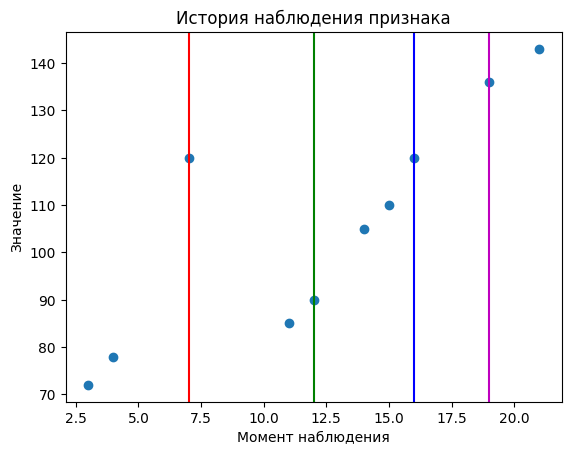

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90, 105] [110] [120] [136, 143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  16-15, значения {120} 
Пятый:  нижняя граница  19 - 16, верхняя граница  21-16, значения {136, 143} 


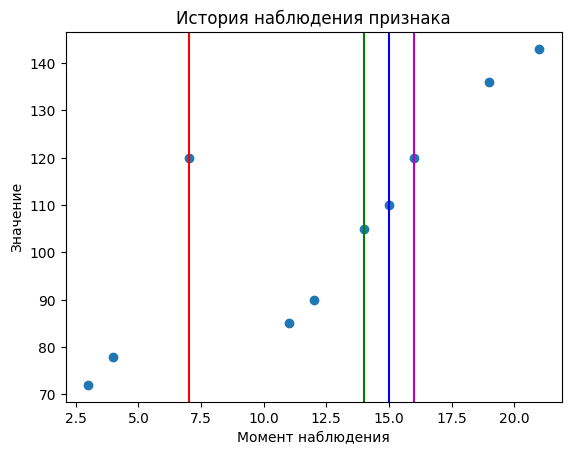

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90, 105] [110] [120, 136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  15-14, значения {110} 
Четвертый:  нижняя граница  16 - 15, верхняя граница  19-15, значения {120, 136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


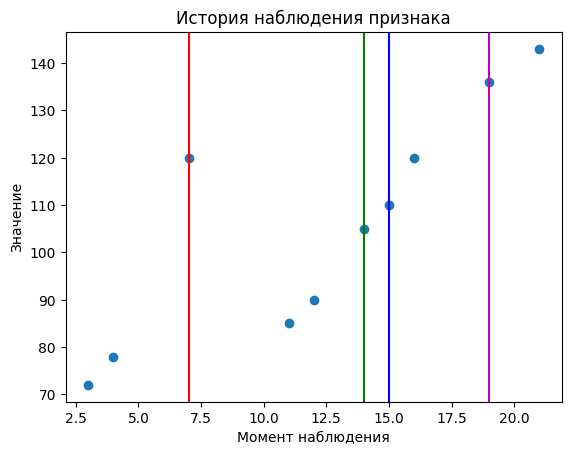

[3, 4, 7, 11, 12, 14, 15, 16, 19, 21]
Значения периодов: [72, 78, 120] [85, 90, 105] [110, 120] [136] [143]
Первый:  нижняя граница  3, верхняя граница  7, значения {72, 120, 78} 
Второй:  нижняя граница  11 - 7, верхняя граница  14-7, значения {105, 90, 85} 
Третий:  нижняя граница  15 - 14, верхняя граница  16-14, значения {120, 110} 
Четвертый:  нижняя граница  19 - 16, верхняя граница  19-16, значения {136} 
Пятый:  нижняя граница  21 - 19, верхняя граница  21-19, значения {143} 


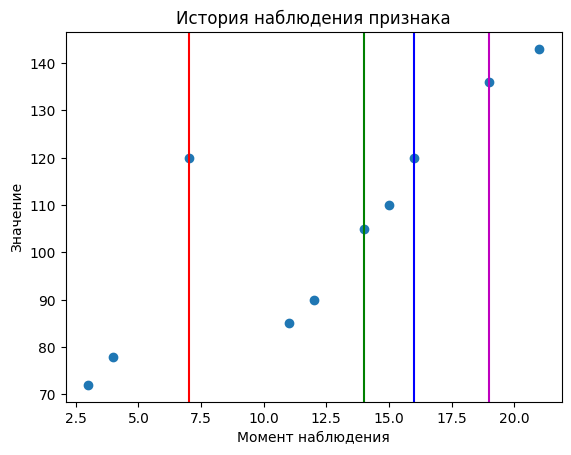

[1, 2, 3, 4, 5, 17]
Значения: ['бордовый', 'бордовый', 'бордовый'] ['с белым налетом', 'красный', 'с алыми пятнами']
Первый:  нижняя граница  1, верхняя граница  3, значения {'бордовый'} 
Второй:  нижняя граница  4 - 3, верхняя граница  17-3, значения {'с алыми пятнами', 'с белым налетом', 'красный'} 


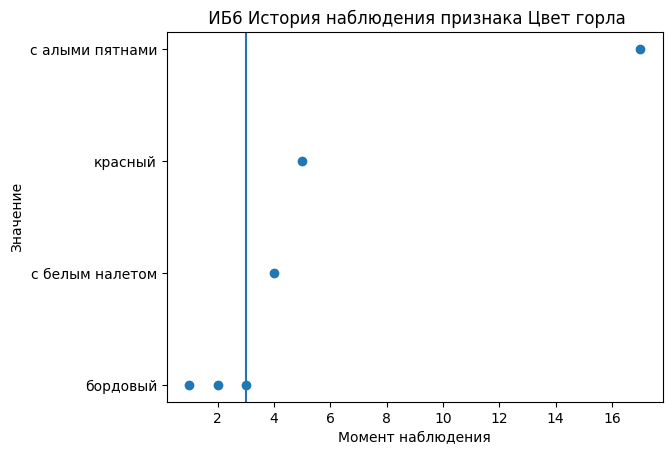

[1, 2, 3, 4, 5, 17]
lists: ['бордовый', 'бордовый', 'бордовый'] ['с белым налетом'] ['красный', 'с алыми пятнами']
Первый:  нижняя граница  1, верхняя граница  3, значения {'бордовый'} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {'с белым налетом'} 
Третий:  нижняя граница  5 - 4, верхняя граница  17-4, значения {'с алыми пятнами', 'красный'} 


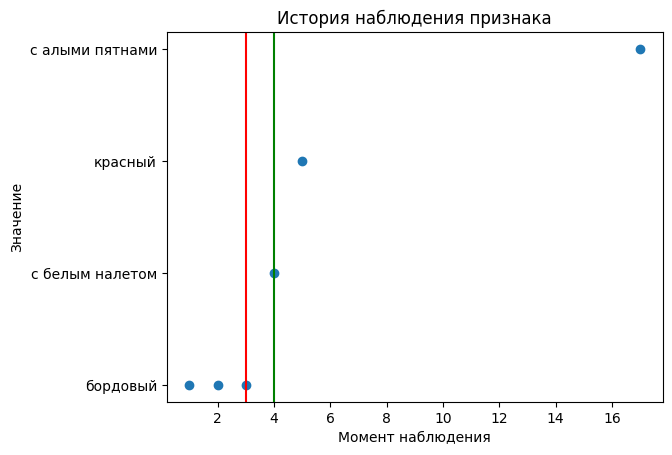

[1, 2, 3, 4, 5, 17]
lists: ['бордовый', 'бордовый', 'бордовый'] ['с белым налетом', 'красный'] ['с алыми пятнами']
Первый:  нижняя граница  1, верхняя граница  3, значения {'бордовый'} 
Второй:  нижняя граница  4 - 3, верхняя граница  5-3, значения {'с белым налетом', 'красный'} 
Третий:  нижняя граница  17 - 5, верхняя граница  17-5, значения {'с алыми пятнами'} 


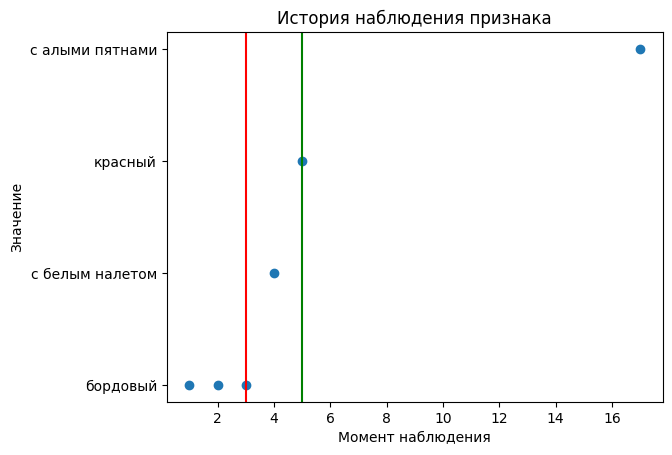

[1, 2, 3, 4, 5, 17]
lists: ['бордовый', 'бордовый', 'бордовый'] ['с белым налетом'] ['красный'] ['с алыми пятнами']
Первый:  нижняя граница  1, верхняя граница  3, значения {'бордовый'} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {'с белым налетом'} 
Третий:  нижняя граница  5 - 4, верхняя граница  5-4, значения {'красный'} 
Четвертый:  нижняя граница  17 - 5, верхняя граница  17-5, значения {'с алыми пятнами'} 


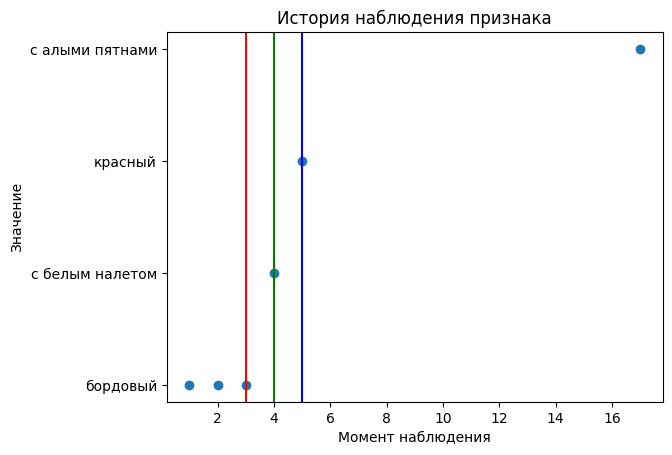

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2] [38.8, 39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Третий:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


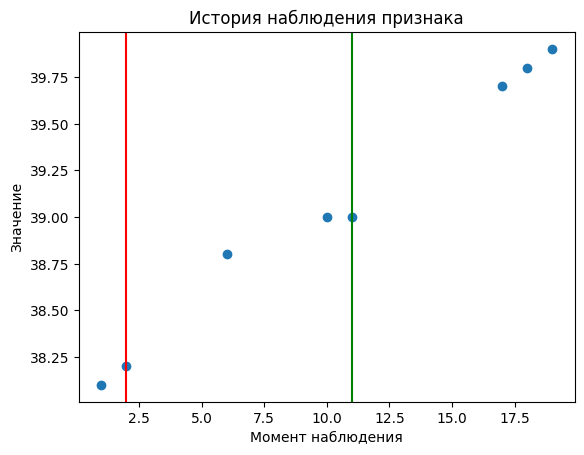

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2, 38.8] [39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Третий:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


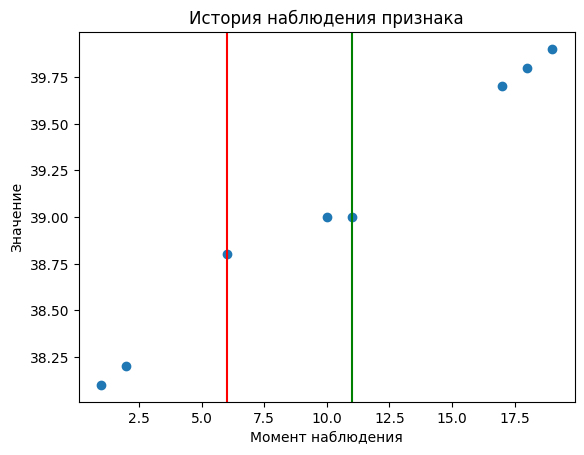

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2, 38.8] [39, 39, 39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Третий:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


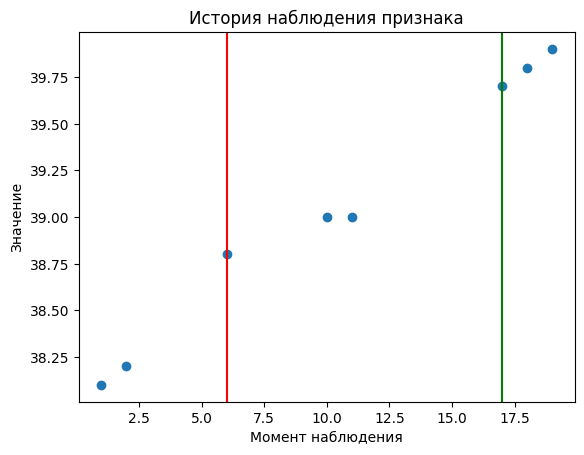

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1] [38.2] [38.8, 39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  2-1, значения {38.2} 
Третий:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


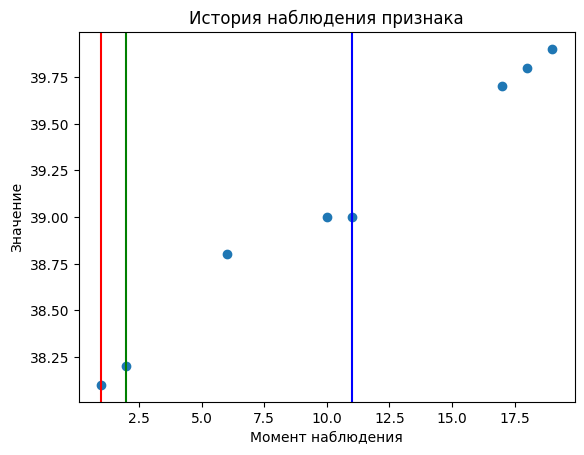

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1] [38.2, 38.8] [39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  6-1, значения {38.8, 38.2} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


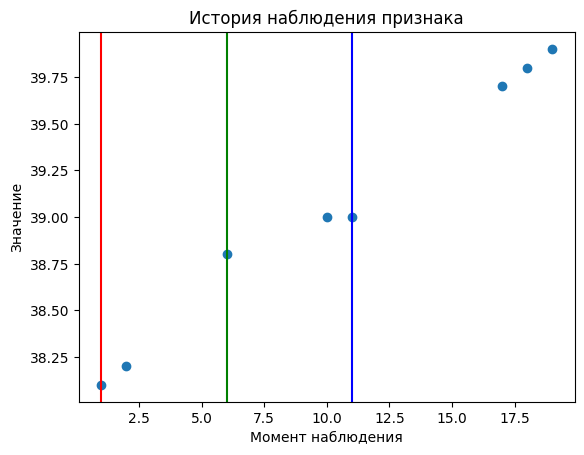

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1] [38.2, 38.8] [39, 39, 39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  6-1, значения {38.8, 38.2} 
Третий:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


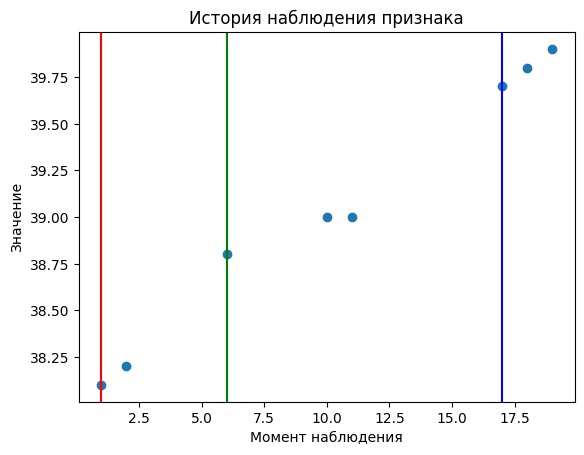

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2] [38.8] [39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


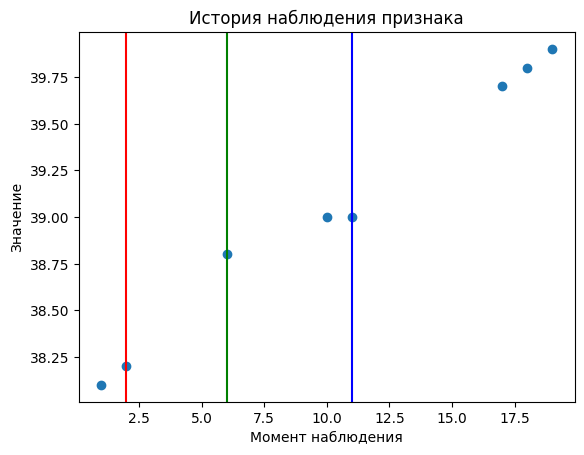

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2] [38.8] [39, 39, 39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Третий:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


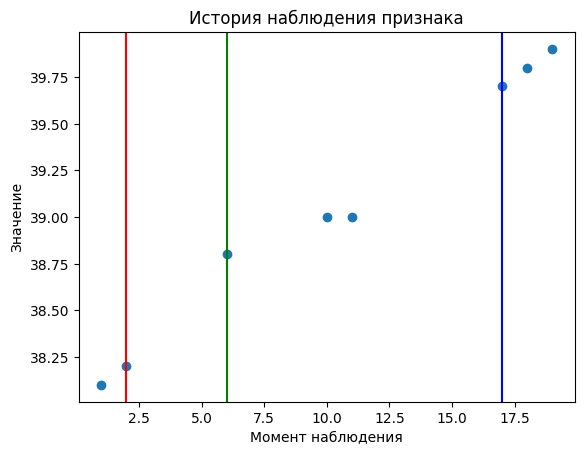

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2] [38.8, 39, 39] [39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Третий:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


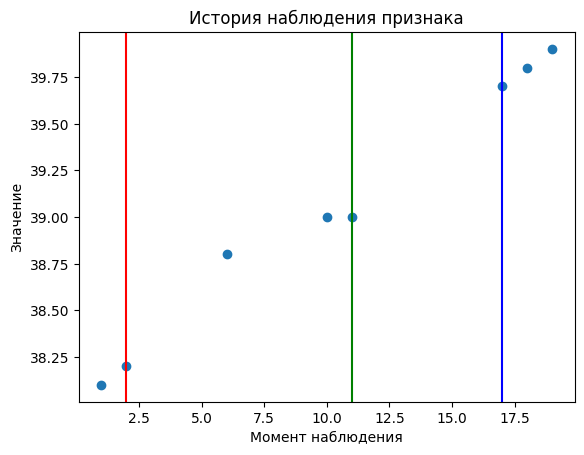

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2] [38.8, 39, 39] [39.7, 39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Третий:  нижняя граница  17 - 11, верхняя граница  18-11, значения {39.8, 39.7} 
Четвертый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


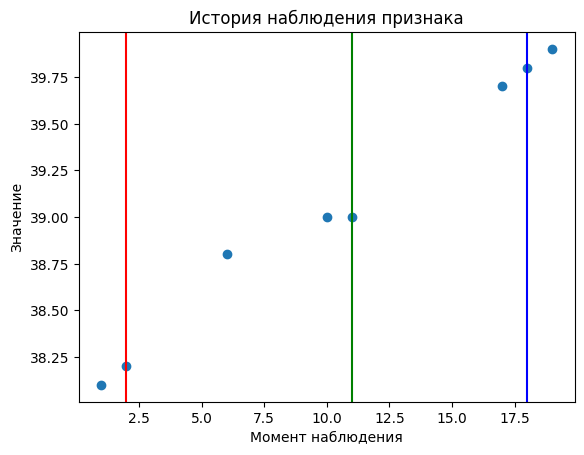

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2, 38.8] [39, 39] [39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Третий:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


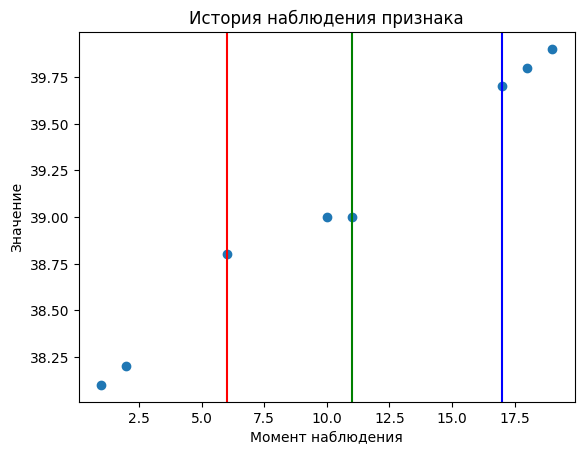

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2, 38.8] [39, 39] [39.7, 39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Третий:  нижняя граница  17 - 11, верхняя граница  18-11, значения {39.8, 39.7} 
Четвертый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


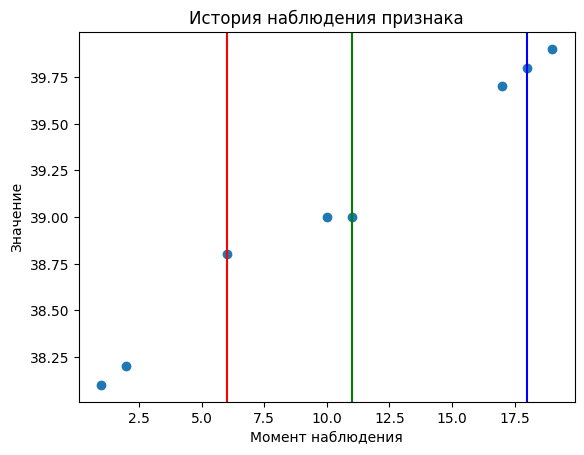

[1, 2, 6, 10, 11, 17, 18, 19]
lists: [38.1, 38.2, 38.8] [39, 39, 39.7] [39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Третий:  нижняя граница  18 - 17, верхняя граница  18-17, значения {39.8} 
Четвертый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


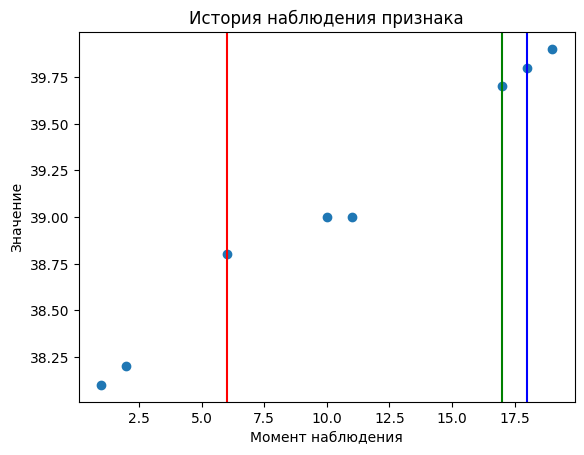

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2] [38.8] [39, 39] [39.7, 39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  2-1, значения {38.2} 
Третий:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Четвертый:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Пятый:  нижняя граница  17 - 11, верхняя граница  19-11, значения {39.9, 39.8, 39.7} 


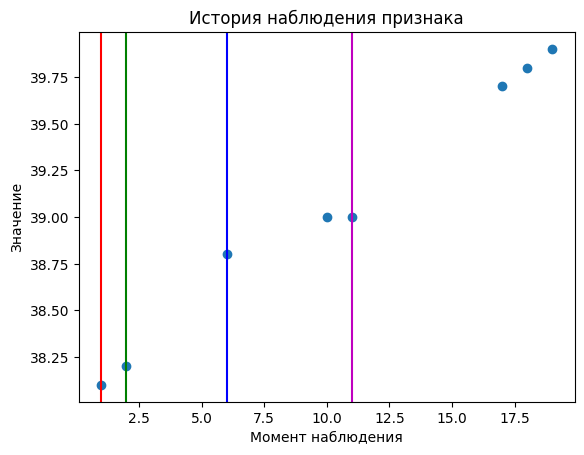

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2] [38.8] [39, 39, 39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  2-1, значения {38.2} 
Третий:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Четвертый:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Пятый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


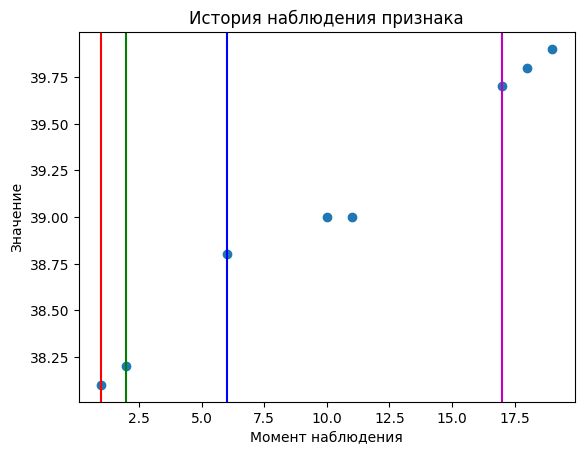

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2] [38.8, 39, 39] [39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  2-1, значения {38.2} 
Третий:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Пятый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


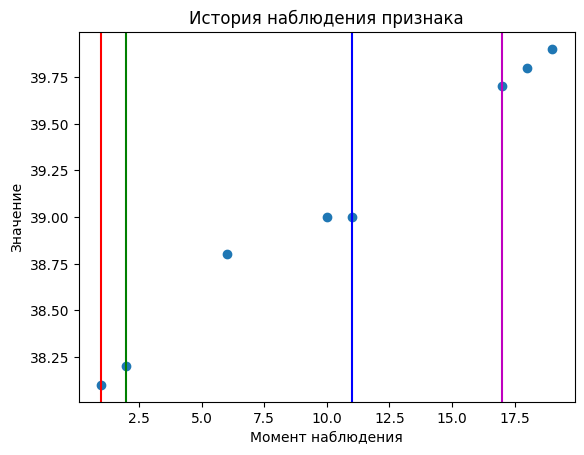

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2] [38.8, 39, 39] [39.7, 39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  2-1, значения {38.2} 
Третий:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  18-11, значения {39.8, 39.7} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


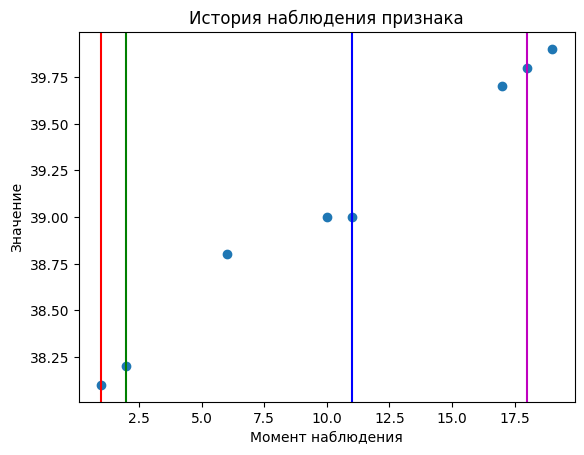

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2, 38.8] [39, 39] [39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  6-1, значения {38.8, 38.2} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Пятый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


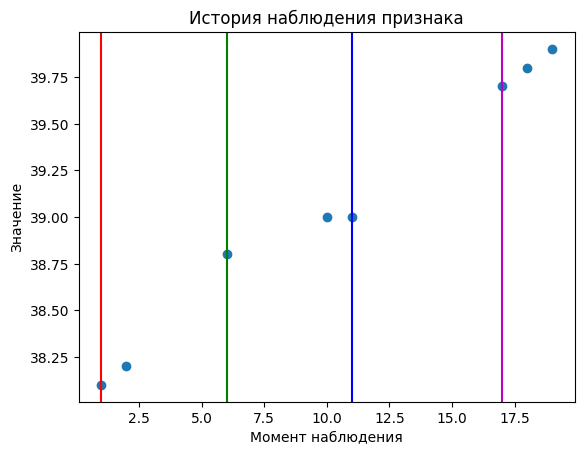

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2, 38.8] [39, 39] [39.7, 39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  6-1, значения {38.8, 38.2} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  18-11, значения {39.8, 39.7} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


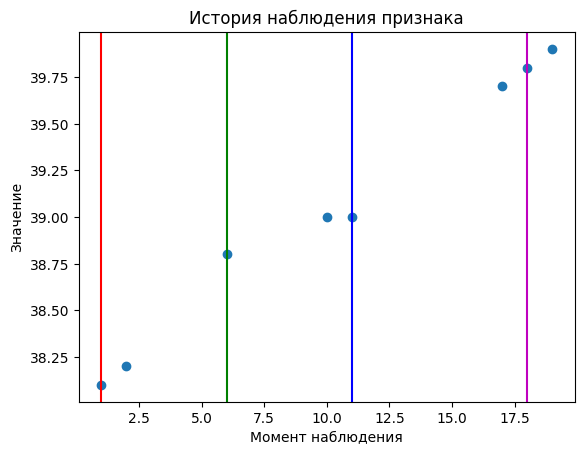

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1] [38.2, 38.8] [39, 39, 39.7] [39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  1, значения {38.1} 
Второй:  нижняя граница  2 - 1, верхняя граница  6-1, значения {38.8, 38.2} 
Третий:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  18-17, значения {39.8} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


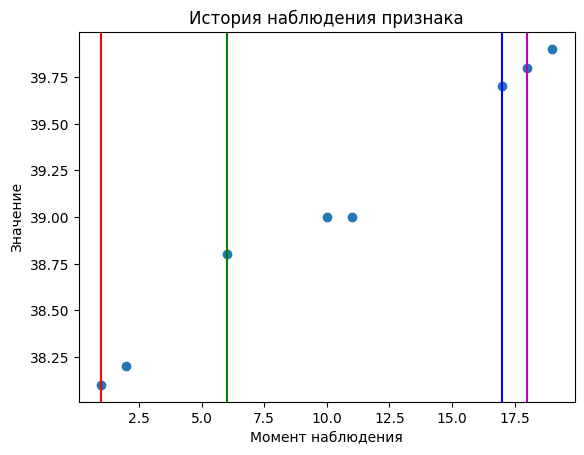

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1, 38.2] [38.8] [39, 39] [39.7] [39.8, 39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Пятый:  нижняя граница  18 - 17, верхняя граница  19-17, значения {39.9, 39.8} 


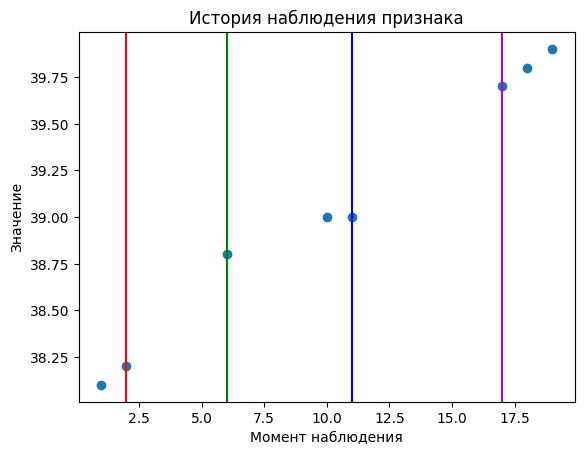

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1, 38.2] [38.8] [39, 39] [39.7, 39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Третий:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Четвертый:  нижняя граница  17 - 11, верхняя граница  18-11, значения {39.8, 39.7} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


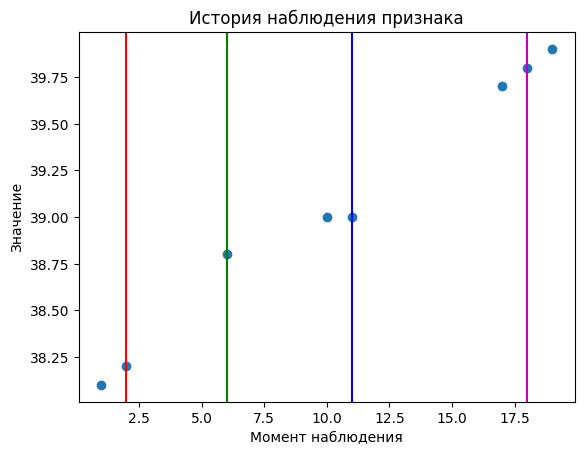

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1, 38.2] [38.8] [39, 39, 39.7] [39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  6-2, значения {38.8} 
Третий:  нижняя граница  10 - 6, верхняя граница  17-6, значения {39.7, 39} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  18-17, значения {39.8} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


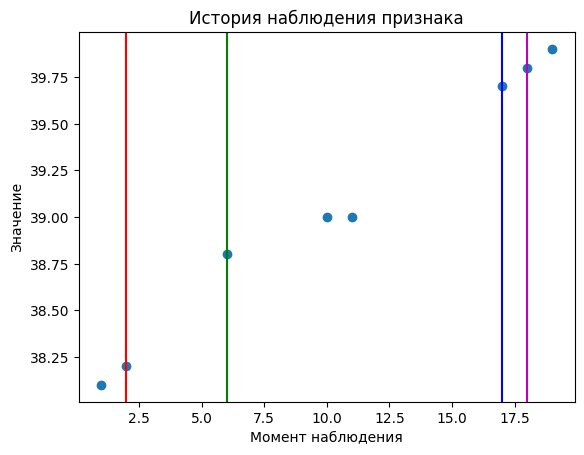

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1, 38.2] [38.8, 39, 39] [39.7] [39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  2, значения {38.2, 38.1} 
Второй:  нижняя граница  6 - 2, верхняя граница  11-2, значения {38.8, 39} 
Третий:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  18-17, значения {39.8} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


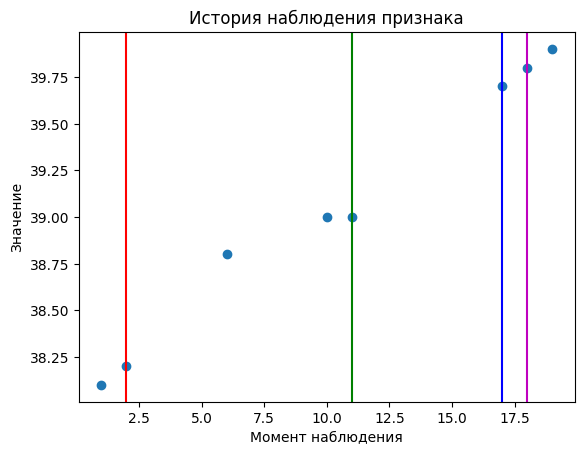

[1, 2, 6, 10, 11, 17, 18, 19]
Значения периодов: [38.1, 38.2, 38.8] [39, 39] [39.7] [39.8] [39.9]
Первый:  нижняя граница  1, верхняя граница  6, значения {38.2, 38.8, 38.1} 
Второй:  нижняя граница  10 - 6, верхняя граница  11-6, значения {39} 
Третий:  нижняя граница  17 - 11, верхняя граница  17-11, значения {39.7} 
Четвертый:  нижняя граница  18 - 17, верхняя граница  18-17, значения {39.8} 
Пятый:  нижняя граница  19 - 18, верхняя граница  19-18, значения {39.9} 


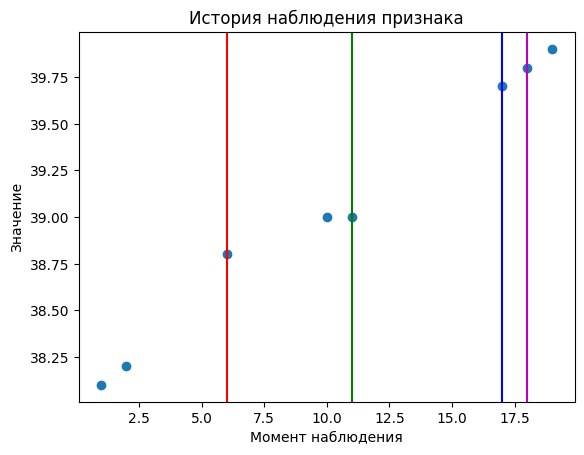

[3, 4, 5, 9, 14, 15, 17]
lists: [3] [4, 5, 6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  3, значения {3} 
Второй:  нижняя граница  4 - 3, верхняя граница  9-3, значения {4, 5, 6} 
Третий:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


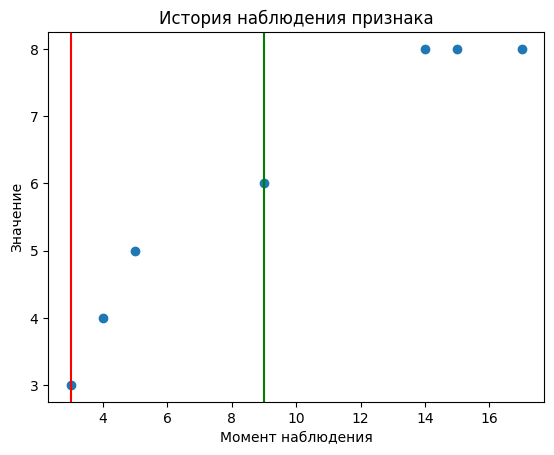

[3, 4, 5, 9, 14, 15, 17]
lists: [3, 4] [5, 6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  4, значения {3, 4} 
Второй:  нижняя граница  5 - 4, верхняя граница  9-4, значения {5, 6} 
Третий:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


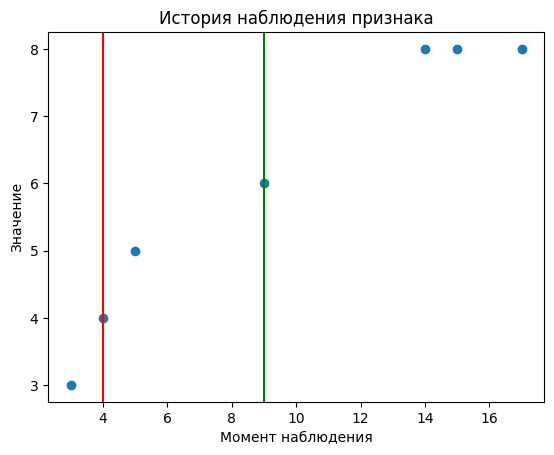

[3, 4, 5, 9, 14, 15, 17]
lists: [3, 4, 5] [6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  5, значения {3, 4, 5} 
Второй:  нижняя граница  9 - 5, верхняя граница  9-5, значения {6} 
Третий:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


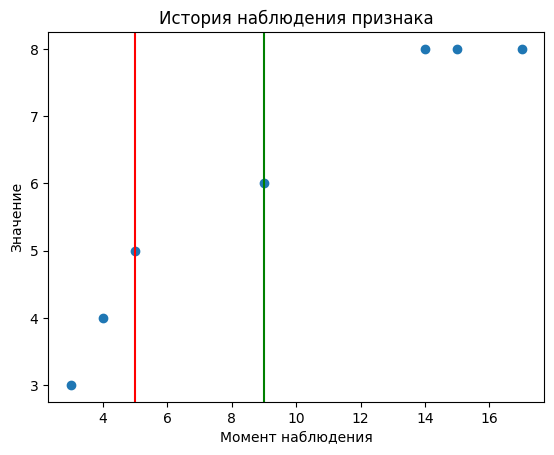

[3, 4, 5, 9, 14, 15, 17]
lists: [3] [4] [5, 6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  3, значения {3} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {4} 
Третий:  нижняя граница  5 - 4, верхняя граница  9-4, значения {5, 6} 
Четвертый:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


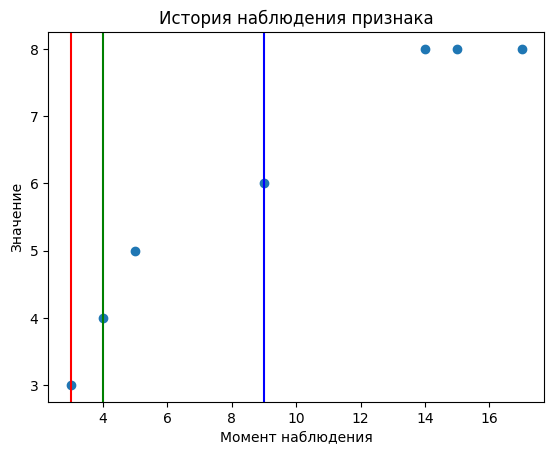

[3, 4, 5, 9, 14, 15, 17]
lists: [3] [4, 5] [6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  3, значения {3} 
Второй:  нижняя граница  4 - 3, верхняя граница  5-3, значения {4, 5} 
Третий:  нижняя граница  9 - 5, верхняя граница  9-5, значения {6} 
Четвертый:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


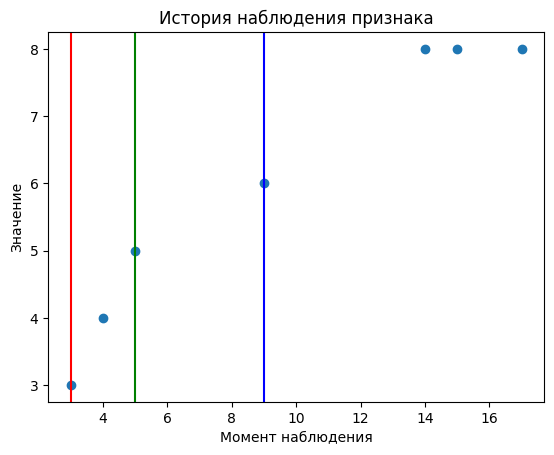

[3, 4, 5, 9, 14, 15, 17]
lists: [3, 4] [5] [6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  4, значения {3, 4} 
Второй:  нижняя граница  5 - 4, верхняя граница  5-4, значения {5} 
Третий:  нижняя граница  9 - 5, верхняя граница  9-5, значения {6} 
Четвертый:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


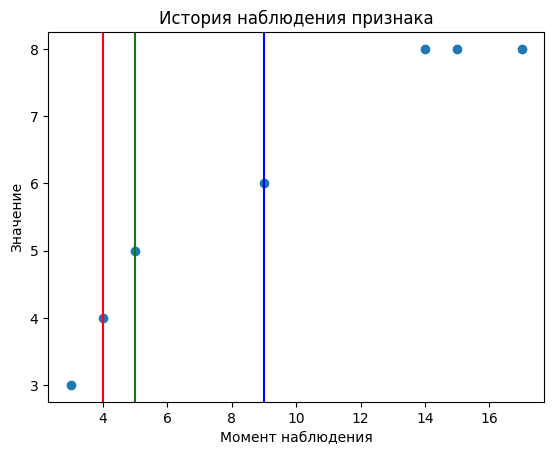

[3, 4, 5, 9, 14, 15, 17]
Значения периодов: [3] [4] [5] [6] [8, 8, 8]
Первый:  нижняя граница  3, верхняя граница  3, значения {3} 
Второй:  нижняя граница  4 - 3, верхняя граница  4-3, значения {4} 
Третий:  нижняя граница  5 - 4, верхняя граница  5-4, значения {5} 
Четвертый:  нижняя граница  9 - 5, верхняя граница  9-5, значения {6} 
Пятый:  нижняя граница  14 - 9, верхняя граница  17-9, значения {8} 


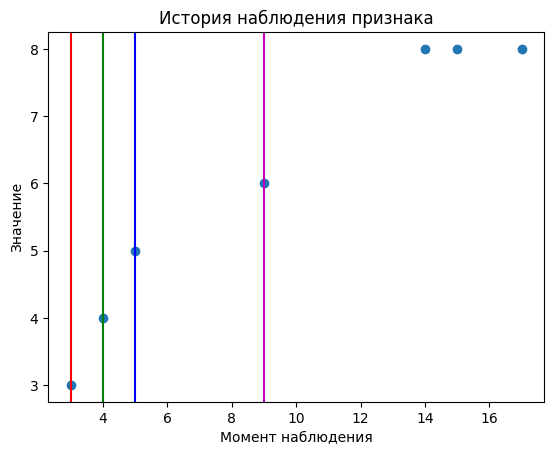

In [20]:
Graphs(df.loc[df['ИБ'] == 'ИБ6'], 'ИБ6')